#### $4)$ $Cálculo$ $de$ $Tasas$
(⚠️ Aquí comienza el uso de otras fuentes externas)

- Construcción de tasas de secuestro por cada 100.000 habitantes.
- Fuente sugerida: Censo Nacional de Población 2018 del DANE.
- Cálculo de tasas anuales por municipio y departamento.
- Visualización comparativa: mapa de tasas vs mapa de conteos.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx
import warnings
pd.options.mode.chained_assignment = None 
from sklearn.cluster import DBSCAN
import re
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:

DF=pd.read_csv('/Users/mac/Library/CloudStorage/OneDrive-UniversidadExternadodeColombia/MINE/segundo semestre/Seminario/Mi_primer_proyecto/Datos/DF_pivot.csv')

In [4]:
import geopandas as gpd

# Cargar shapefile
gdf = gpd.read_file("/Users/mac/Library/CloudStorage/OneDrive-UniversidadExternadodeColombia/MINE/segundo semestre/Seminario/Mi_primer_proyecto/Datos/MGN2024_MPIO_POLITICO/MGN_ADM_MPIO_GRAFICO.shp")  # Ajusta la ruta según tu carpeta


In [6]:
# Asegurar que columnas numéricas están bien
DF['SECUESTRO EXTORSIVO'] = pd.to_numeric(DF['SECUESTRO EXTORSIVO'], errors='coerce')
DF['SECUESTRO SIMPLE'] = pd.to_numeric(DF['SECUESTRO SIMPLE'], errors='coerce')
DF['TOTAL SECUESTROS'] = pd.to_numeric(DF['TOTAL SECUESTROS'], errors='coerce')

# Agrupar por KEY y conservar info única de municipio, departamento, año y cod_muni
DF_resumido = DF.groupby('key').agg({
    'municipio': 'first',
    'departamento': 'first',
    'ano': 'first',
    'mes': 'first',
    'cod_muni': 'first',
    'SECUESTRO EXTORSIVO': 'sum',
    'SECUESTRO SIMPLE': 'sum',
    'TOTAL SECUESTROS': 'sum'
}).reset_index()


In [7]:
# Agrupar por 'key', sumando las columnas de secuestros
DF_ = DF.groupby('key').agg({
    'municipio': 'first',
    'departamento': 'first',
    'ano': 'first',
    'mes': 'first',
    'fecha_hecho': 'min',  # puedes cambiar por 'first' o 'max' según prefieras
    'cod_muni': 'first',
    'SECUESTRO EXTORSIVO': 'sum',
    'SECUESTRO SIMPLE': 'sum',
    'TOTAL SECUESTROS': 'sum'
}).reset_index()


In [8]:
DF_

key municipio departamento   ano  mes fecha_hecho  cod_muni  \
0     05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      5001   
1     05001-1997  MEDELLIN    ANTIOQUIA  1997    1  1997-01-22      5001   
2     05001-1998  MEDELLIN    ANTIOQUIA  1998    1  1998-01-05      5001   
3     05001-1999  MEDELLIN    ANTIOQUIA  1999    1  1999-01-10      5001   
4     05001-2000  MEDELLIN    ANTIOQUIA  2000    1  2000-01-03      5001   
...          ...       ...          ...   ...  ...         ...       ...   
6595  99773-2003  CUMARIBO      VICHADA  2003    2  2003-02-19     99773   
6596  99773-2005  CUMARIBO      VICHADA  2005    6  2005-06-25     99773   
6597  99773-2006  CUMARIBO      VICHADA  2006    9  2006-09-11     99773   
6598  99773-2011  CUMARIBO      VICHADA  2011    3  2011-03-08     99773   
6599  99773-2013  CUMARIBO      VICHADA  2013    9  2013-09-18     99773   

      SECUESTRO EXTORSIVO  SECUESTRO SIMPLE  TOTAL SECUESTROS  
0                    73.0               8.0              81.0  
1                    55.0              19.0              74.0  
2                    60.0              21.0              81.0  
3                    78.0              26.0             104.0  
4                    66.0              53.0             119.0  
...                   ...               ...               ...  
6595                  3.0               0.0               3.0  
6596                  0.0               1.0               1.0  
6597                  0.0               1.0               1.0  
6598                  1.0               0.0               1.0  
6599                  0.0               1.0               1.0  

[6600 rows x 10 columns]

- POBLACIÓN

In [9]:

ruta = '/Users/mac/Library/CloudStorage/OneDrive-UniversidadExternadodeColombia/MINE/segundo semestre/Seminario/Mi_primer_proyecto/Datos/poblacion_municipal_1995_2035.csv'
df_poblacion = pd.read_csv(ruta)

# Mostrar una muestra
print(df_poblacion.head())


          key  POB_CABECERA  POB_RURAL  POB_TOTAL
0  05001-1995       1704227      52534    1756761
1  05002-1995          6757      18574      25331
2  05004-1995           636       2148       2784
3  05021-1995          1863       2952       4815
4  05030-1995         10355      14640      24995


In [10]:
# Hacer el merge: df_merged como base principal
MERGE1 = DF_.merge(df_poblacion, on='key', how='left')


In [11]:
# Ver cantidad de valores nulos por columna
print(MERGE1.isnull().sum())


key                    0
municipio              0
departamento           0
ano                    0
mes                    0
fecha_hecho            0
cod_muni               0
SECUESTRO EXTORSIVO    0
SECUESTRO SIMPLE       0
TOTAL SECUESTROS       0
POB_CABECERA           0
POB_RURAL              0
POB_TOTAL              0
dtype: int64


In [12]:
MERGE1['Tasa_100_habitantes'] = (MERGE1['TOTAL SECUESTROS'] / MERGE1['POB_TOTAL']) * 100000

In [13]:
MERGE1

key municipio departamento   ano  mes fecha_hecho  cod_muni  \
0     05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      5001   
1     05001-1997  MEDELLIN    ANTIOQUIA  1997    1  1997-01-22      5001   
2     05001-1998  MEDELLIN    ANTIOQUIA  1998    1  1998-01-05      5001   
3     05001-1999  MEDELLIN    ANTIOQUIA  1999    1  1999-01-10      5001   
4     05001-2000  MEDELLIN    ANTIOQUIA  2000    1  2000-01-03      5001   
...          ...       ...          ...   ...  ...         ...       ...   
6595  99773-2003  CUMARIBO      VICHADA  2003    2  2003-02-19     99773   
6596  99773-2005  CUMARIBO      VICHADA  2005    6  2005-06-25     99773   
6597  99773-2006  CUMARIBO      VICHADA  2006    9  2006-09-11     99773   
6598  99773-2011  CUMARIBO      VICHADA  2011    3  2011-03-08     99773   
6599  99773-2013  CUMARIBO      VICHADA  2013    9  2013-09-18     99773   

      SECUESTRO EXTORSIVO  SECUESTRO SIMPLE  TOTAL SECUESTROS  POB_CABECERA  \
0                    73.0               8.0              81.0       1735720   
1                    55.0              19.0              74.0       1764426   
2                    60.0              21.0              81.0       1795878   
3                    78.0              26.0             104.0       1826719   
4                    66.0              53.0             119.0       1857106   
...                   ...               ...               ...           ...   
6595                  3.0               0.0               3.0          2133   
6596                  0.0               1.0               1.0          2270   
6597                  0.0               1.0               1.0          2333   
6598                  1.0               0.0               1.0          2613   
6599                  0.0               1.0               1.0          2696   

      POB_RURAL  POB_TOTAL  Tasa_100_habitantes  
0         52111    1787831             4.530630  
1         51875    1816301             4.074215  
2         51513    1847391             4.384562  
3         51146    1877865             5.538204  
4         50753    1907859             6.237358  
...         ...        ...                  ...  
6595      41715      43848             6.841817  
6596      45141      47411             2.109215  
6597      46873      49206             2.032272  
6598      56115      58728             1.702765  
6599      59875      62571             1.598184  

[6600 rows x 14 columns]

- GRAFICAS Y VISUALIZACIONES

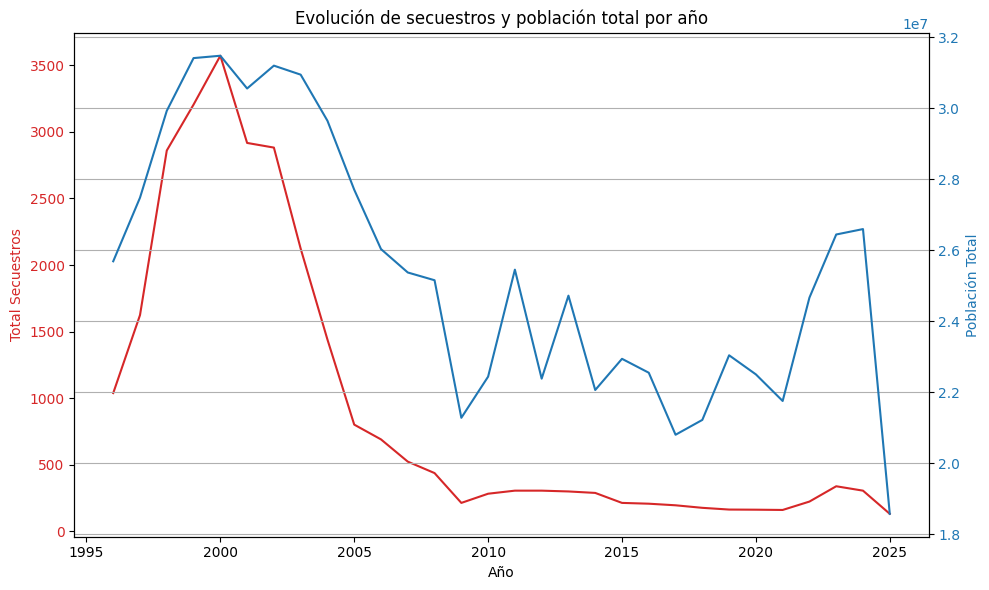

In [14]:
import matplotlib.pyplot as plt

# Asegurarse de que 'ano' sea entero
MERGE1['ano'] = MERGE1['ano'].astype(int)

# Agrupación por año
df_anual = MERGE1.groupby('ano')[['TOTAL SECUESTROS', 'POB_TOTAL']].sum().reset_index()

# Crear figura y eje izquierdo
fig, ax1 = plt.subplots(figsize=(10, 6))

# Línea de secuestros (eje izquierdo)
color1 = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('Total Secuestros', color=color1)
ax1.plot(df_anual['ano'], df_anual['TOTAL SECUESTROS'], color=color1, label='Total Secuestros')
ax1.tick_params(axis='y', labelcolor=color1)

# Crear eje derecho
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Población Total', color=color2)
ax2.plot(df_anual['ano'], df_anual['POB_TOTAL'], color=color2, label='Población Total')
ax2.tick_params(axis='y', labelcolor=color2)

# Título y grid
plt.title('Evolución de secuestros y población total por año')
fig.tight_layout()
plt.grid(True)
plt.show()


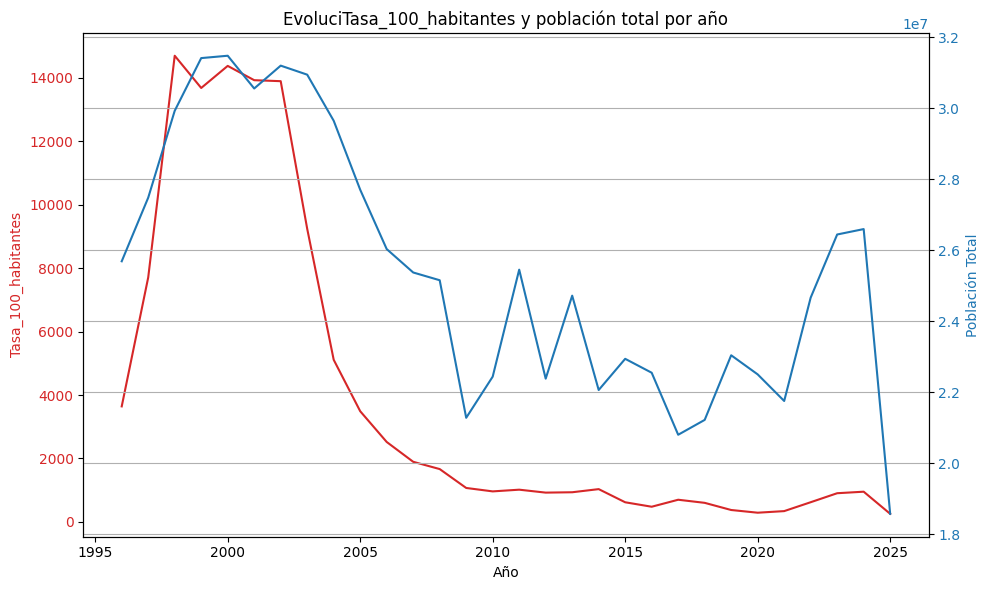

In [15]:
import matplotlib.pyplot as plt

# Asegurarse de que 'ano' sea entero
MERGE1['ano'] = MERGE1['ano'].astype(int)

# Agrupación por año
df_anual = MERGE1.groupby('ano')[['Tasa_100_habitantes', 'POB_TOTAL']].sum().reset_index()

# Crear figura y eje izquierdo
fig, ax1 = plt.subplots(figsize=(10, 6))

# LínTasa_100_habitantes (eje izquierdo)
color1 = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('Tasa_100_habitantes', color=color1)
ax1.plot(df_anual['ano'], df_anual['Tasa_100_habitantes'], color=color1, label='Tasa_100_habitantes')
ax1.tick_params(axis='y', labelcolor=color1)

# Crear eje derecho
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Población Total', color=color2)
ax2.plot(df_anual['ano'], df_anual['POB_TOTAL'], color=color2, label='Población Total')
ax2.tick_params(axis='y', labelcolor=color2)

# Título y grid
plt.title('EvoluciTasa_100_habitantes y población total por año')
fig.tight_layout()
plt.grid(True)
plt.show()


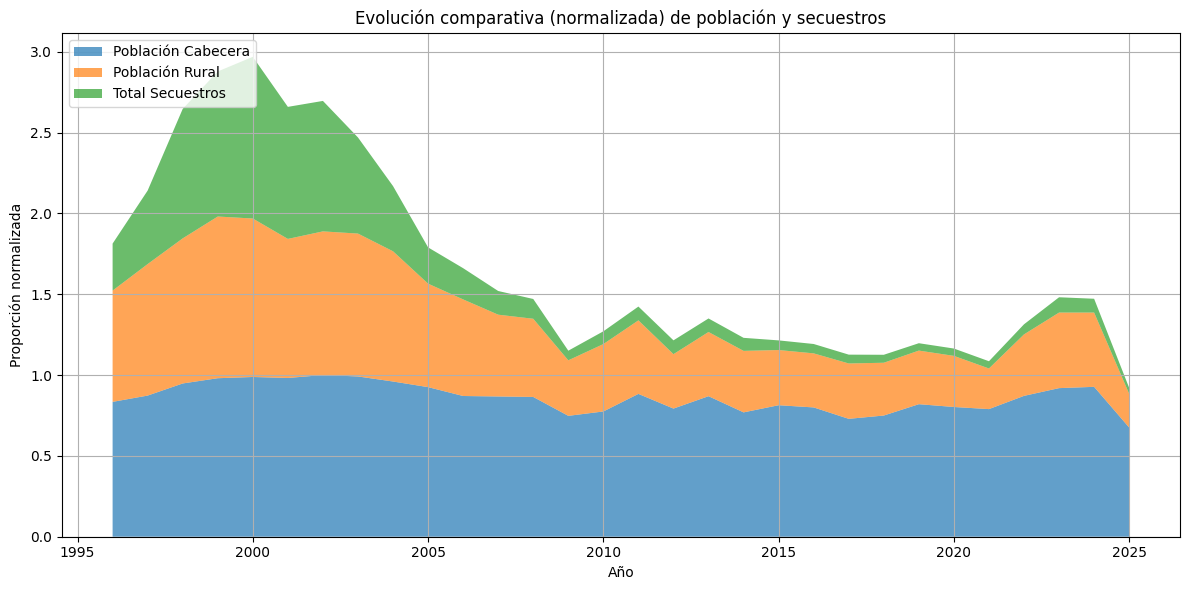

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por año
df_area = MERGE1.groupby('ano')[['TOTAL SECUESTROS', 'POB_RURAL', 'POB_CABECERA']].sum().reset_index()

# Normalizar cada columna para que se comparen proporcionalmente
df_area_norm = df_area.copy()
df_area_norm['TOTAL SECUESTROS'] = df_area_norm['TOTAL SECUESTROS'] / df_area_norm['TOTAL SECUESTROS'].max()
df_area_norm['POB_RURAL'] = df_area_norm['POB_RURAL'] / df_area_norm['POB_RURAL'].max()
df_area_norm['POB_CABECERA'] = df_area_norm['POB_CABECERA'] / df_area_norm['POB_CABECERA'].max()

# Stacked Area Plot
plt.figure(figsize=(12, 6))
plt.stackplot(
    df_area_norm['ano'],
    df_area_norm['POB_CABECERA'],
    df_area_norm['POB_RURAL'],
    df_area_norm['TOTAL SECUESTROS'],
    labels=['Población Cabecera', 'Población Rural', 'Total Secuestros'],
    alpha=0.7
)
plt.title('Evolución comparativa (normalizada) de población y secuestros')
plt.xlabel('Año')
plt.ylabel('Proporción normalizada')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
import plotly.express as px

# Crear columna de quinquenio
MERGE1['periodo'] = (MERGE1['ano'] // 5) * 5

# Recortar outliers extremos (top 1%)
umbral_99 = MERGE1['Tasa_100_habitantes'].quantile(0.99)
df_filtrado = MERGE1[MERGE1['Tasa_100_habitantes'] <= umbral_99]

# Boxplot con Plotly
fig = px.box(
    df_filtrado,
    x="periodo",
    y="Tasa_100_habitantes",
    points="all",  # para mostrar todos los puntos
    color="periodo",
    labels={
        "Tasa_100_habitantes": "Tasa por cada 100 mil habitantes",
        "periodo": "Periodo (cada 5 años)"
    },
    title="Distribución de la tasa de secuestros por cada 100 mil habitantes (boxplot por quinquenio)"
)

fig.update_layout(showlegend=False)
fig.show()


In [18]:
import plotly.express as px

fig = px.scatter(
    MERGE1,
    x="POB_RURAL",
    y="TOTAL SECUESTROS",
    size="TOTAL SECUESTROS",
    color="departamento",           # Puedes usar "ano" o quitarlo
    hover_name="municipio",
    size_max=60,
    labels={
        "POB_RURAL": "Población rural",
        "TOTAL SECUESTROS": "Total de secuestros"
    },
    title="Relación entre población rural y total de secuestros"
)

fig.update_layout(template='plotly_white')
fig.show()


In [19]:
import plotly.express as px

fig = px.treemap(
    MERGE1,
    path=['departamento', 'municipio'],  # Jerarquía: departamento > municipio
    values='Tasa_100_habitantes',
    color='Tasa_100_habitantes',
    color_continuous_scale='Reds',
    labels={'Tasa_100_habitantes': 'Tasa por 100 mil hab.'},
    title='Treemap de la tasa de secuestros por cada 100 mil habitantes'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [20]:
# Asegurar que el código del shapefile sea string con 5 dígitos
gdf['cod_muni'] = gdf['mpio_cdpmp'].astype(str).str.zfill(5)

# Crear columna 'cod_muni' en MERGE1 a partir de los primeros 5 dígitos de 'key'
MERGE1['cod_muni'] = MERGE1['key'].str[:5]


In [21]:

import geopandas as gpd
# Unir la tasa al GeoDataFrame
gdf_merge = MERGE1.merge(gdf, on='cod_muni', how='left')
# Reconvertir a GeoDataFrame si perdió la geometría
gdf_merge = gpd.GeoDataFrame(gdf_merge, geometry='geometry')


ASESINATOS

In [37]:
ruta = '/Users/mac/Library/CloudStorage/OneDrive-UniversidadExternadodeColombia/MINE/segundo semestre/Seminario/Mi_primer_proyecto/Datos/datos_1995-2024/Eventos_de_Violencia_del_Conflicto_Armado_Asesinatos.csv'

df_asesinatos = pd.read_csv(ruta, delimiter=';')

df_nuevo = df_asesinatos[["Código DANE de Municipio", "Año", "Mes", "Día", "Ocupación"]].copy()

# Crea la nueva columna "Cantidad Casos" asignándole el valor de 1 a cada fila
df_nuevo["Cantidad Casos"] = 1

# Vista previa del nuevo DataFrame
print(df_nuevo.head())


  Código DANE de Municipio   Año  Mes  Día        Ocupación  Cantidad Casos
0                    25320  1995    6    6  SIN INFORMACIÓN               1
1                    25320  1995    6    6  SIN INFORMACIÓN               1
2                    25320  1995    6   12  SIN INFORMACIÓN               1
3                    25386  1995    9   15        CAMPESINO               1
4                    25386  1995    9   15        CAMPESINO               1


In [38]:
# Ver valores únicos para cada columna seleccionada

columnas = ["Código DANE de Municipio", "Año", "Mes", "Día", "Ocupación"]

for columna in columnas:
    valores_unicos = df_nuevo[columna].unique()
    print(f"\nValores únicos en '{columna}' ({len(valores_unicos)} valores únicos):\n")
    print(valores_unicos)



Valores únicos en 'Código DANE de Municipio' (1082 valores únicos):

['25320' '25386' '25394' ... '25295' '88001' '19513']

Valores únicos en 'Año' (30 valores únicos):

[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023 2024]

Valores únicos en 'Mes' (13 valores únicos):

[ 6  9  5  8 10  1 12  7  4  2 11  0  3]

Valores únicos en 'Día' (32 valores únicos):

[ 6 12 15 18 22 14  4 31 13 20 19  7 27  1 23 21 11 25  2  3  5 16  0 10
 17 28  8 24 26 30  9 29]

Valores únicos en 'Ocupación' (33 valores únicos):

['SIN INFORMACIÓN' 'CAMPESINO' 'TRABAJADOR DE FINCA' 'EMPLEADO'
 'CONDUCTOR/MOTORISTA' 'COMERCIANTE' 'NO APLICA' 'FUNCIONARIO PÚBLICO'
 'TRABAJO SIN ESPECIFICAR' 'OBRERO' 'PROFESIONAL' 'ESTUDIANTE'
 'ECONOMÍA INFORMAL' 'PARAMILITAR' 'PENSIONADO' 'ADMINISTRADOR DE FINCA'
 'SEGURIDAD PRIVADA' 'RELIGIOSO' 'GANADERO/HACENDADO' 'PESCADOR'
 'DELINCUENTE' 'OTRA ¿CUÁL?' 'GUERRILLERO' 'FUERZA P

In [40]:
# Asegurar que Código DANE sea tipo string y tenga exactamente 5 dígitos
df_nuevo["Código DANE de Municipio"] = df_nuevo["Código DANE de Municipio"].astype(str).str.zfill(5)

# Crear nueva columna "key" combinando código y año
df_nuevo["key"] = df_nuevo["Código DANE de Municipio"] + "-" + df_nuevo["Año"].astype(str)




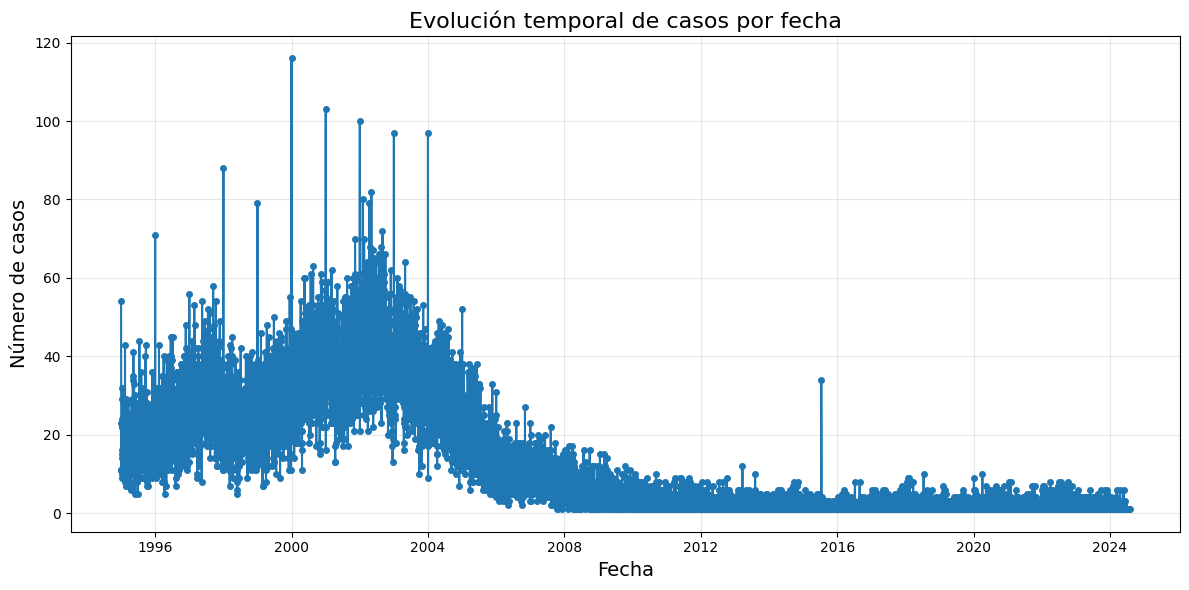

In [44]:
df_nuevo['Fecha'] = pd.to_datetime(df_nuevo['Año'].astype(str) + '-' +
                                   df_nuevo['Mes'].astype(str) + '-' +
                                   df_nuevo['Día'].astype(str), errors='coerce')


df_tiempo = df_nuevo.groupby('Fecha')['Cantidad Casos'].sum().reset_index()

# Ordenar por fecha
df_tiempo.sort_values('Fecha', inplace=True)

# Graficar serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_tiempo['Fecha'], df_tiempo['Cantidad Casos'], marker='o', linestyle='-', markersize=4)

# Personalización del gráfico
plt.title('Evolución temporal de casos por fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Número de casos', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()



In [62]:
# Agrupa por "key" y suma la columna "Cantidad Casos"
df_agrupado = df_nuevo.groupby('key', as_index=False)['Cantidad Casos'].sum()

# Renombrar columna en df_agrupado
df_agrupado.rename(columns={'Cantidad Casos': 'ASESINATOS'}, inplace=True)




#### $5)$ $Cruce$ $con$ $otras$ $variables$ $contextuales$

El estudiante debe traer al menos 2 de las siguientes dimensiones:
- A. Presencia de grupos armados
Fuente: INDEPAZ, CERAC, informes de la Fundación Ideas para la Paz.
¿Hay relación entre secuestros y zonas con presencia armada?

- B. Indicadores socioeconómicos
Fuente: DANE o SISBEN
PIB per cápita, pobreza multidimensional, acceso a educación.

- C. Infraestructura institucional
Fuente: Datos abiertos de Fiscalía, Defensoría del Pueblo.
Presencia de fuerzas de seguridad, estaciones de policía, etc.

- D. Conflicto y Paz
Fuente: Centro Nacional de Memoria Histórica, JEP.
Zonas de conflicto armado, acuerdos de paz, zonas de concentración.

- E. Comparativo con otro delito (opcional)
Comparar el comportamiento del secuestro con otros delitos (p. ej., homicidio o desaparición).

In [66]:
MERGE2 = MERGE1.merge(df_agrupado, on='key', how='left')

MERGE2['ASESINATOS'] = MERGE2['ASESINATOS'].fillna(0)

MERGE2



key municipio departamento   ano  mes fecha_hecho cod_muni  \
0     05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06    05001   
1     05001-1997  MEDELLIN    ANTIOQUIA  1997    1  1997-01-22    05001   
2     05001-1998  MEDELLIN    ANTIOQUIA  1998    1  1998-01-05    05001   
3     05001-1999  MEDELLIN    ANTIOQUIA  1999    1  1999-01-10    05001   
4     05001-2000  MEDELLIN    ANTIOQUIA  2000    1  2000-01-03    05001   
...          ...       ...          ...   ...  ...         ...      ...   
6595  99773-2003  CUMARIBO      VICHADA  2003    2  2003-02-19    99773   
6596  99773-2005  CUMARIBO      VICHADA  2005    6  2005-06-25    99773   
6597  99773-2006  CUMARIBO      VICHADA  2006    9  2006-09-11    99773   
6598  99773-2011  CUMARIBO      VICHADA  2011    3  2011-03-08    99773   
6599  99773-2013  CUMARIBO      VICHADA  2013    9  2013-09-18    99773   

      SECUESTRO EXTORSIVO  SECUESTRO SIMPLE  TOTAL SECUESTROS  POB_CABECERA  \
0                    73.0               8.0              81.0       1735720   
1                    55.0              19.0              74.0       1764426   
2                    60.0              21.0              81.0       1795878   
3                    78.0              26.0             104.0       1826719   
4                    66.0              53.0             119.0       1857106   
...                   ...               ...               ...           ...   
6595                  3.0               0.0               3.0          2133   
6596                  0.0               1.0               1.0          2270   
6597                  0.0               1.0               1.0          2333   
6598                  1.0               0.0               1.0          2613   
6599                  0.0               1.0               1.0          2696   

      POB_RURAL  POB_TOTAL  Tasa_100_habitantes  periodo   AñoMes  ASESINATOS  
0         52111    1787831             4.530630     1995  1996-01      1036.0  
1         51875    1816301             4.074215     1995  1997-01      1270.0  
2         51513    1847391             4.384562     1995  1998-01      1308.0  
3         51146    1877865             5.538204     1995  1999-01      1528.0  
4         50753    1907859             6.237358     2000  2000-01      1662.0  
...         ...        ...                  ...      ...      ...         ...  
6595      41715      43848             6.841817     2000  2003-02         4.0  
6596      45141      47411             2.109215     2005  2005-06        10.0  
6597      46873      49206             2.032272     2005  2006-09         8.0  
6598      56115      58728             1.702765     2010  2011-03         0.0  
6599      59875      62571             1.598184     2010  2013-09         0.0  

[6600 rows x 17 columns]

In [70]:
MERGE2_gdf = gdf_merge.merge(df_agrupado, on='key', how='left')

MERGE2_gdf['ASESINATOS'] = MERGE2_gdf['ASESINATOS'].fillna(0)




- GRAFICAS Y VISUALIZACIONES

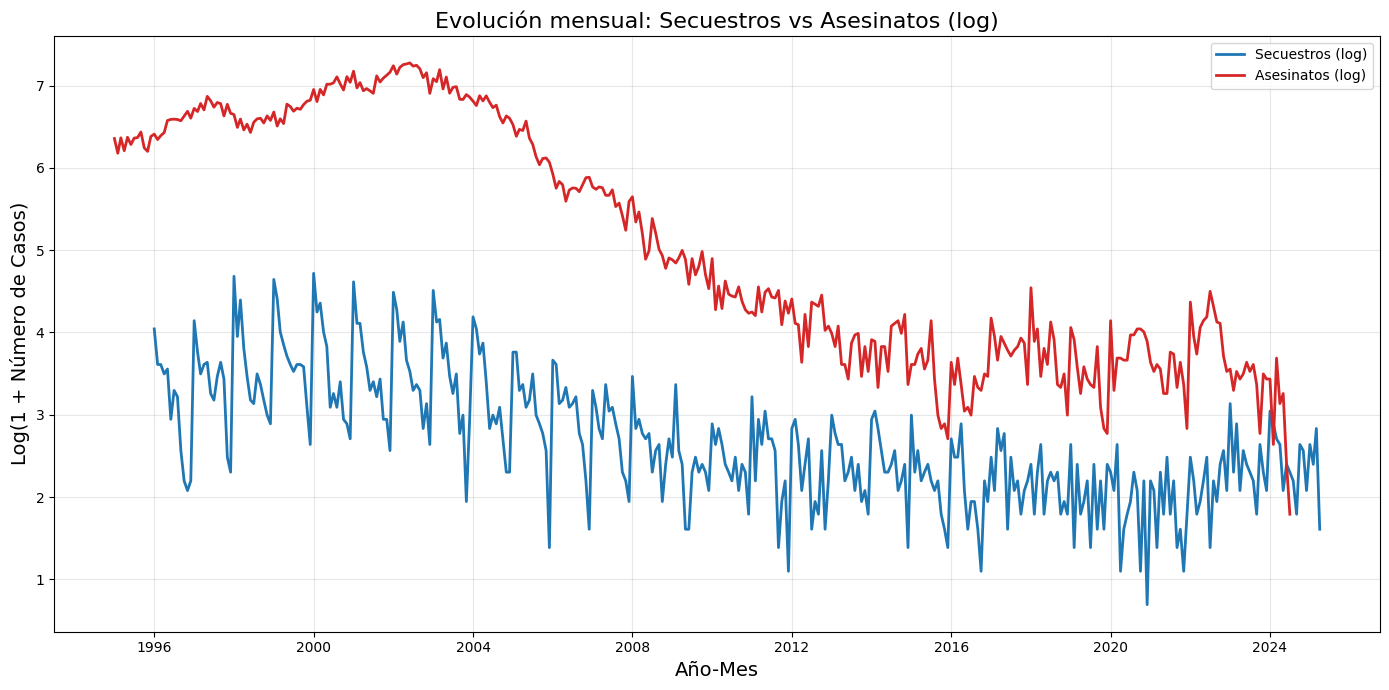

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Asegurar que las fechas sean datetime
MERGE1['fecha_hecho'] = pd.to_datetime(MERGE1['fecha_hecho'], errors='coerce')
df_tiempo['Fecha'] = pd.to_datetime(df_tiempo['Fecha'], errors='coerce')

# Crear columna año-mes
MERGE1['AñoMes'] = MERGE1['fecha_hecho'].dt.to_period('M').astype(str)
df_tiempo['AñoMes'] = df_tiempo['Fecha'].dt.to_period('M').astype(str)

# Agrupar secuestros por año-mes
secuestros_tiempo = MERGE1.groupby('AñoMes').size().reset_index(name='Casos_Secuestro')

# Agrupar asesinatos por año-mes
asesinatos_tiempo = df_tiempo.groupby('AñoMes')['Cantidad Casos'].sum().reset_index()

# Normalizar por logaritmo
secuestros_tiempo['log_Casos_Secuestro'] = np.log1p(secuestros_tiempo['Casos_Secuestro'])
asesinatos_tiempo['log_Cantidad_Casos'] = np.log1p(asesinatos_tiempo['Cantidad Casos'])

# Convertir AñoMes a datetime para graficar correctamente
secuestros_tiempo['AñoMes'] = pd.to_datetime(secuestros_tiempo['AñoMes'])
asesinatos_tiempo['AñoMes'] = pd.to_datetime(asesinatos_tiempo['AñoMes'])

# Gráfica de línea de tiempo mensual
plt.figure(figsize=(14,7))

plt.plot(secuestros_tiempo['AñoMes'], secuestros_tiempo['log_Casos_Secuestro'], 
         label='Secuestros (log)', color='tab:blue', linewidth=2)

plt.plot(asesinatos_tiempo['AñoMes'], asesinatos_tiempo['log_Cantidad_Casos'], 
         label='Asesinatos (log)', color='tab:red', linewidth=2)

plt.title('Evolución mensual: Secuestros vs Asesinatos (log)', fontsize=16)
plt.xlabel('Año-Mes', fontsize=14)
plt.ylabel('Log(1 + Número de Casos)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


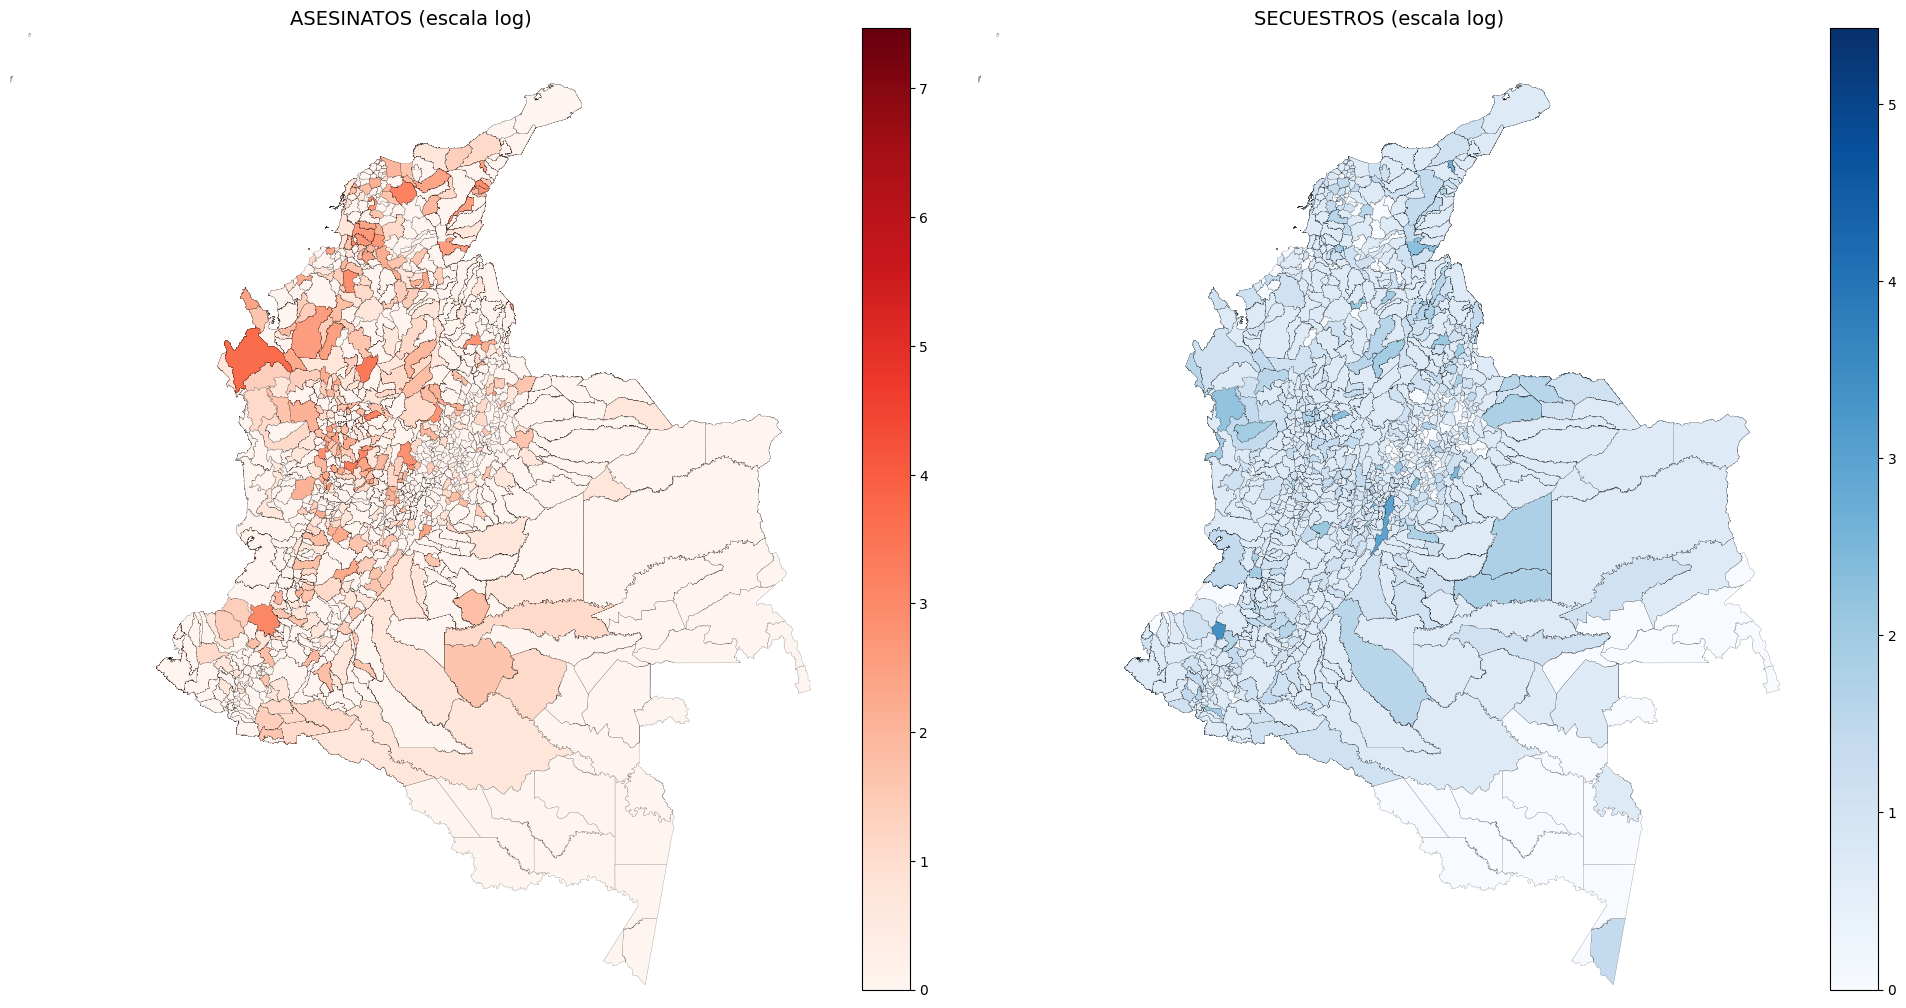

In [76]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Asegurar valores válidos
MERGE2_gdf['ASESINATOS'] = MERGE2_gdf['ASESINATOS'].fillna(0)
MERGE2_gdf['TOTAL SECUESTROS'] = MERGE2_gdf['TOTAL SECUESTROS'].fillna(0)

# Log para mejor diferenciación visual
MERGE2_gdf['ASESINATOS_log'] = np.log1p(MERGE2_gdf['ASESINATOS'])
MERGE2_gdf['SECUESTROS_log'] = np.log1p(MERGE2_gdf['TOTAL SECUESTROS'])

# Unir la base completa gdf con MERGE2_gdf, dejando todo gdf y completando con datos cuando existan
mapa_completo = gdf.merge(MERGE2_gdf[['cod_muni', 'ASESINATOS_log', 'SECUESTROS_log']], 
                          how='left', on='cod_muni')

# Reemplazar NaN post merge con 0 o seguir con missing_kwds para mostrar sin datos
mapa_completo['ASESINATOS_log'] = mapa_completo['ASESINATOS_log'].fillna(0)
mapa_completo['SECUESTROS_log'] = mapa_completo['SECUESTROS_log'].fillna(0)

# Crear el gráfico
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Mapa ASESINATOS
mapa_completo.plot(column='ASESINATOS_log',
                   cmap='Reds',
                   legend=True,
                   linewidth=0.1,
                   edgecolor='black',
                   missing_kwds={"color": "lightgrey", "label": "Sin datos"},
                   ax=axes[0])
axes[0].set_title('ASESINATOS (escala log)', fontsize=14)
axes[0].axis('off')

# Mapa SECUESTROS
mapa_completo.plot(column='SECUESTROS_log',
                   cmap='Blues',
                   legend=True,
                   linewidth=0.1,
                   edgecolor='black',
                   missing_kwds={"color": "lightgrey", "label": "Sin datos"},
                   ax=axes[1])
axes[1].set_title('SECUESTROS (escala log)', fontsize=14)
axes[1].axis('off')

# Mostrar todo el país según gdf
for ax in axes:
    ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
    ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

plt.tight_layout()
plt.show()


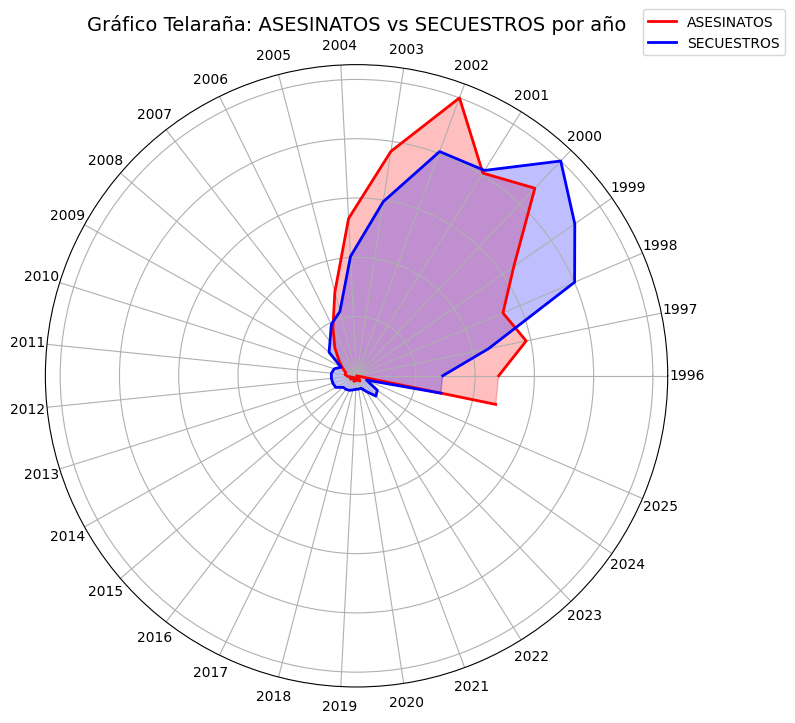

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Agrupación por año
df_radar = MERGE2_gdf.groupby('ano')[['TOTAL SECUESTROS', 'ASESINATOS']].sum().reset_index()

# Normalización opcional
df_radar['ASESINATOS_norm'] = df_radar['ASESINATOS'] / df_radar['ASESINATOS'].max()
df_radar['SECUESTROS_norm'] = df_radar['TOTAL SECUESTROS'] / df_radar['TOTAL SECUESTROS'].max()

# Labels y valores (sin repetir todavía)
labels = df_radar['ano'].astype(str).tolist()
values_asesinatos = df_radar['ASESINATOS_norm'].tolist()
values_secuestros = df_radar['SECUESTROS_norm'].tolist()

# Cerrar ciclo
labels.append(labels[0])
values_asesinatos.append(values_asesinatos[0])
values_secuestros.append(values_secuestros[0])

# Ángulos
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Gráfico radar
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

ax.plot(angles, values_asesinatos, label='ASESINATOS', color='red', linewidth=2)
ax.fill(angles, values_asesinatos, color='red', alpha=0.25)

ax.plot(angles, values_secuestros, label='SECUESTROS', color='blue', linewidth=2)
ax.fill(angles, values_secuestros, color='blue', alpha=0.25)

ax.set_xticks(angles[:-1])  # Omitimos el último (cierre)
ax.set_xticklabels(labels[:-1], fontsize=10)

ax.set_yticklabels([])
ax.set_title('Gráfico Telaraña: ASESINATOS vs SECUESTROS por año', fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


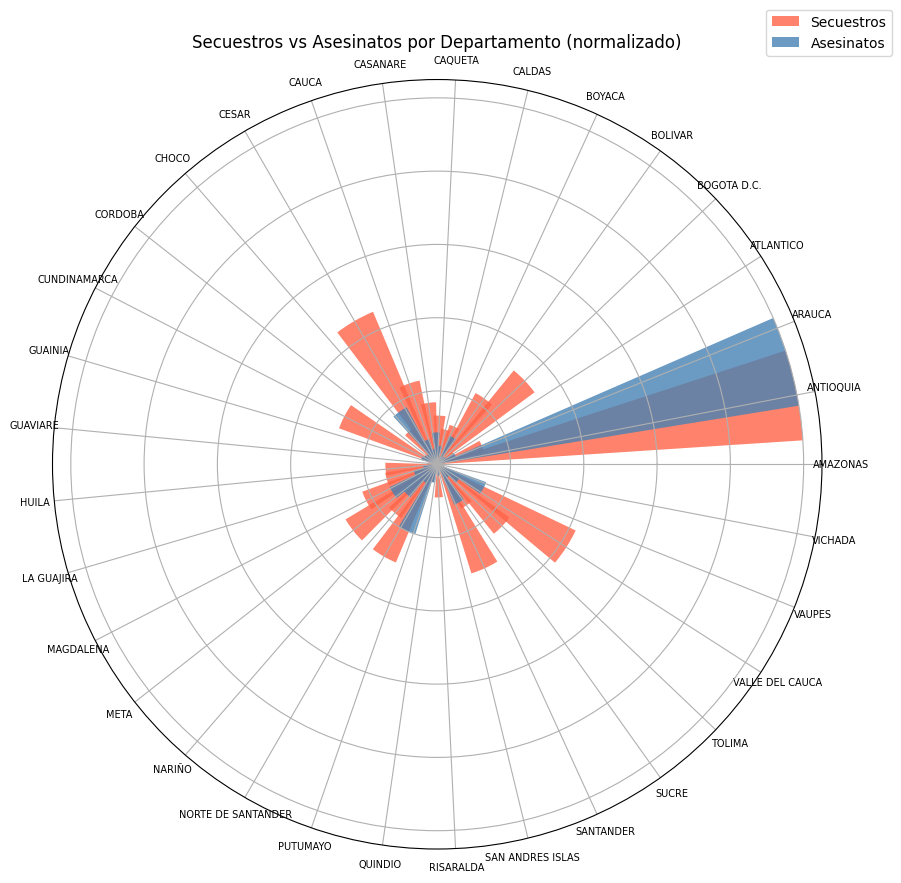

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Agrupar datos por departamento
df_circular = MERGE2_gdf.groupby('departamento')[['TOTAL SECUESTROS', 'ASESINATOS']].sum().reset_index()

# Normalizar para mejor comparación visual
df_circular['SECU_NORM'] = df_circular['TOTAL SECUESTROS'] / df_circular['TOTAL SECUESTROS'].max()
df_circular['ASESI_NORM'] = df_circular['ASESINATOS'] / df_circular['ASESINATOS'].max()

# Reordenar alfabéticamente para visual limpio
df_circular = df_circular.sort_values(by='departamento')

# Parámetros
N = len(df_circular)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

labels = df_circular['departamento'].tolist()
secuestros = df_circular['SECU_NORM'].values
asesinatos = df_circular['ASESI_NORM'].values

# Desfase para barras de asesinatos
angles_sec = angles
angles_asesi = angles + (2 * np.pi / N / 2)  # desfase para no solaparse

# Crear figura
fig = plt.figure(figsize=(9, 9))
ax = plt.subplot(111, polar=True)

# Barras para secuestros
bars1 = ax.bar(angles_sec, secuestros, width=0.25, color='tomato', alpha=0.8, label='Secuestros')

# Barras para asesinatos
bars2 = ax.bar(angles_asesi, asesinatos, width=0.25, color='steelblue', alpha=0.8, label='Asesinatos')

# Etiquetas
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=7)

# Limpiar eje radial
ax.set_yticklabels([])

# Título y leyenda
ax.set_title("Secuestros vs Asesinatos por Departamento (normalizado)", fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.show()


IPM, GINI

In [81]:
DF_IPM = pd.read_excel("/Users/mac/Library/CloudStorage/OneDrive-UniversidadExternadodeColombia/MINE/segundo semestre/Seminario/Mi_primer_proyecto/Datos/IPM.xlsx")


In [83]:
# Eliminar filas basura o encabezados repetidos
DF_IPM = DF_IPM[DF_IPM['Código Entidad'].notna()].copy()


In [84]:

# Normalizar código municipio y año
DF_IPM['cod_muni'] = DF_IPM['Código Entidad'].astype(int).astype(str).str.zfill(5)
DF_IPM['ano'] = DF_IPM['Año'].astype(int)





In [85]:
# Crear clave para merge
DF_IPM['key'] = DF_IPM['cod_muni'] + '-' + DF_IPM['ano'].astype(str)

In [86]:
# Normalizar valores
DF_IPM['Dato Numérico'] = (
    DF_IPM['Dato Numérico'].astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
)
DF_IPM['valor_indicador'] = pd.to_numeric(DF_IPM['Dato Numérico'], errors='coerce')


DF_IPM = DF_IPM[['Dato Numérico', 'key', 'Indicador']]

DF_IPM.rename(columns={"Dato Numérico": "IPM"}, inplace=True)



In [87]:
# Ver los valores únicos de la columna 'Indicador'
DF_IPM['Indicador'].unique()


array(['Incidencia de la pobreza monetaria',
       'Incidencia de la pobreza monetaria extrema',
       'Coeficiente de Gini', 'Índice de pobreza multidimensional - IPM',
       'IPM - Cabecera', 'IPM - Rural',
       'Índice de Necesidades Básicas Insatisfechas - NBI - en el área urbana',
       'Índice de Necesidades Básicas Insatisfechas - NBI - en el área rural',
       'Población en condición de miseria',
       'Población en condición de miseria en el área urbana',
       'Población en condición de miseria en el área rural',
       'Porcentaje de niñas, niños y adolescentes en pobreza (proxy)'],
      dtype=object)

In [88]:
# Eliminar las filas donde los primeros 5 dígitos de 'key' sean '01001'
DF_IPM = DF_IPM[~DF_IPM['key'].str[:5].eq('01001')]





In [89]:

# Asegurar que IPM sea numérico
DF_IPM['IPM'] = pd.to_numeric(DF_IPM['IPM'], errors='coerce')

# Quitar el .0 solo si aplica
DF_IPM['IPM'] = DF_IPM['IPM'].apply(lambda x: int(x) if pd.notna(x) and x == int(x) else x)


In [90]:
# Lista de indicadores a conservar
indicadores_deseados = [
    'Índice de pobreza multidimensional - IPM',
    'Población en condición de miseria',
    'Coeficiente de Gini',
    'Incidencia de la pobreza monetaria', 'Incidencia de la pobreza monetaria extrema' 
]

# Filtrar el DataFrame
DF_IPM = DF_IPM[DF_IPM['Indicador'].isin(indicadores_deseados)]


In [91]:


# Pivotear el DataFrame: indicadores a columnas, valores en IPM
df_pivot = DF_IPM.pivot(index='key', columns='Indicador', values='IPM').reset_index()
df_pivot



Indicador         key  Coeficiente de Gini  \
0          05000-2002                 0.59   
1          05000-2003                 0.59   
2          05000-2004                 0.57   
3          05000-2005                 0.56   
4          05000-2008                 0.58   
...               ...                  ...   
3270       99524-2018                  NaN   
3271       99624-2005                  NaN   
3272       99624-2018                  NaN   
3273       99773-2005                  NaN   
3274       99773-2018                  NaN   

Indicador  Incidencia de la pobreza monetaria  \
0                                        47.9   
1                                        46.2   
2                                        44.4   
3                                        41.8   
4                                        38.3   
...                                       ...   
3270                                      NaN   
3271                                      NaN   
3272                                      NaN   
3273                                      NaN   
3274                                      NaN   

Indicador  Incidencia de la pobreza monetaria extrema  \
0                                                17.8   
1                                                15.5   
2                                                14.7   
3                                                13.9   
4                                                15.4   
...                                               ...   
3270                                              NaN   
3271                                              NaN   
3272                                              NaN   
3273                                              NaN   
3274                                              NaN   

Indicador  Población en condición de miseria  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
3270                                   19.44   
3271                                     NaN   
3272                                   14.47   
3273                                     NaN   
3274                                   73.55   

Indicador  Índice de pobreza multidimensional - IPM  
0                                               NaN  
1                                               NaN  
2                                               NaN  
3                                             44.29  
4                                               NaN  
...                                             ...  
3270                                          63.20  
3271                                          90.24  
3272                                          56.80  
3273                                          90.49  
3274                                          91.40  

[3275 rows x 6 columns]

In [92]:
MERGE3 = MERGE2.merge(df_pivot, on='key', how='left')
MERGE3 = MERGE3.fillna(0)

MERGE3

key municipio departamento   ano  mes fecha_hecho cod_muni  \
0     05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06    05001   
1     05001-1997  MEDELLIN    ANTIOQUIA  1997    1  1997-01-22    05001   
2     05001-1998  MEDELLIN    ANTIOQUIA  1998    1  1998-01-05    05001   
3     05001-1999  MEDELLIN    ANTIOQUIA  1999    1  1999-01-10    05001   
4     05001-2000  MEDELLIN    ANTIOQUIA  2000    1  2000-01-03    05001   
...          ...       ...          ...   ...  ...         ...      ...   
6595  99773-2003  CUMARIBO      VICHADA  2003    2  2003-02-19    99773   
6596  99773-2005  CUMARIBO      VICHADA  2005    6  2005-06-25    99773   
6597  99773-2006  CUMARIBO      VICHADA  2006    9  2006-09-11    99773   
6598  99773-2011  CUMARIBO      VICHADA  2011    3  2011-03-08    99773   
6599  99773-2013  CUMARIBO      VICHADA  2013    9  2013-09-18    99773   

      SECUESTRO EXTORSIVO  SECUESTRO SIMPLE  TOTAL SECUESTROS  ...  POB_TOTAL  \
0                    73.0               8.0              81.0  ...    1787831   
1                    55.0              19.0              74.0  ...    1816301   
2                    60.0              21.0              81.0  ...    1847391   
3                    78.0              26.0             104.0  ...    1877865   
4                    66.0              53.0             119.0  ...    1907859   
...                   ...               ...               ...  ...        ...   
6595                  3.0               0.0               3.0  ...      43848   
6596                  0.0               1.0               1.0  ...      47411   
6597                  0.0               1.0               1.0  ...      49206   
6598                  1.0               0.0               1.0  ...      58728   
6599                  0.0               1.0               1.0  ...      62571   

      Tasa_100_habitantes  periodo   AñoMes  ASESINATOS Coeficiente de Gini  \
0                4.530630     1995  1996-01      1036.0                 0.0   
1                4.074215     1995  1997-01      1270.0                 0.0   
2                4.384562     1995  1998-01      1308.0                 0.0   
3                5.538204     1995  1999-01      1528.0                 0.0   
4                6.237358     2000  2000-01      1662.0                 0.0   
...                   ...      ...      ...         ...                 ...   
6595             6.841817     2000  2003-02         4.0                 0.0   
6596             2.109215     2005  2005-06        10.0                 0.0   
6597             2.032272     2005  2006-09         8.0                 0.0   
6598             1.702765     2010  2011-03         0.0                 0.0   
6599             1.598184     2010  2013-09         0.0                 0.0   

      Incidencia de la pobreza monetaria  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
...                                  ...   
6595                                 0.0   
6596                                 0.0   
6597                                 0.0   
6598                                 0.0   
6599                                 0.0   

      Incidencia de la pobreza monetaria extrema  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
6595                                         0.0   
6596                                         0.0   
6597                                         0.0   
6598                                         0.0   
6599                                         0.0   

      Población en condición de mise

In [93]:
MERGE3_IPM = MERGE1.merge(df_pivot, on='key', how='left')
MERGE3_IPM = MERGE3_IPM.fillna(0)

MERGE3_IPM.columns

Index(['key', 'municipio', 'departamento', 'ano', 'mes', 'fecha_hecho',
       'cod_muni', 'SECUESTRO EXTORSIVO', 'SECUESTRO SIMPLE',
       'TOTAL SECUESTROS', 'POB_CABECERA', 'POB_RURAL', 'POB_TOTAL',
       'Tasa_100_habitantes', 'periodo', 'AñoMes', 'Coeficiente de Gini',
       'Incidencia de la pobreza monetaria',
       'Incidencia de la pobreza monetaria extrema',
       'Población en condición de miseria',
       'Índice de pobreza multidimensional - IPM'],
      dtype='object')

GRAFICA MERGE3_IPM

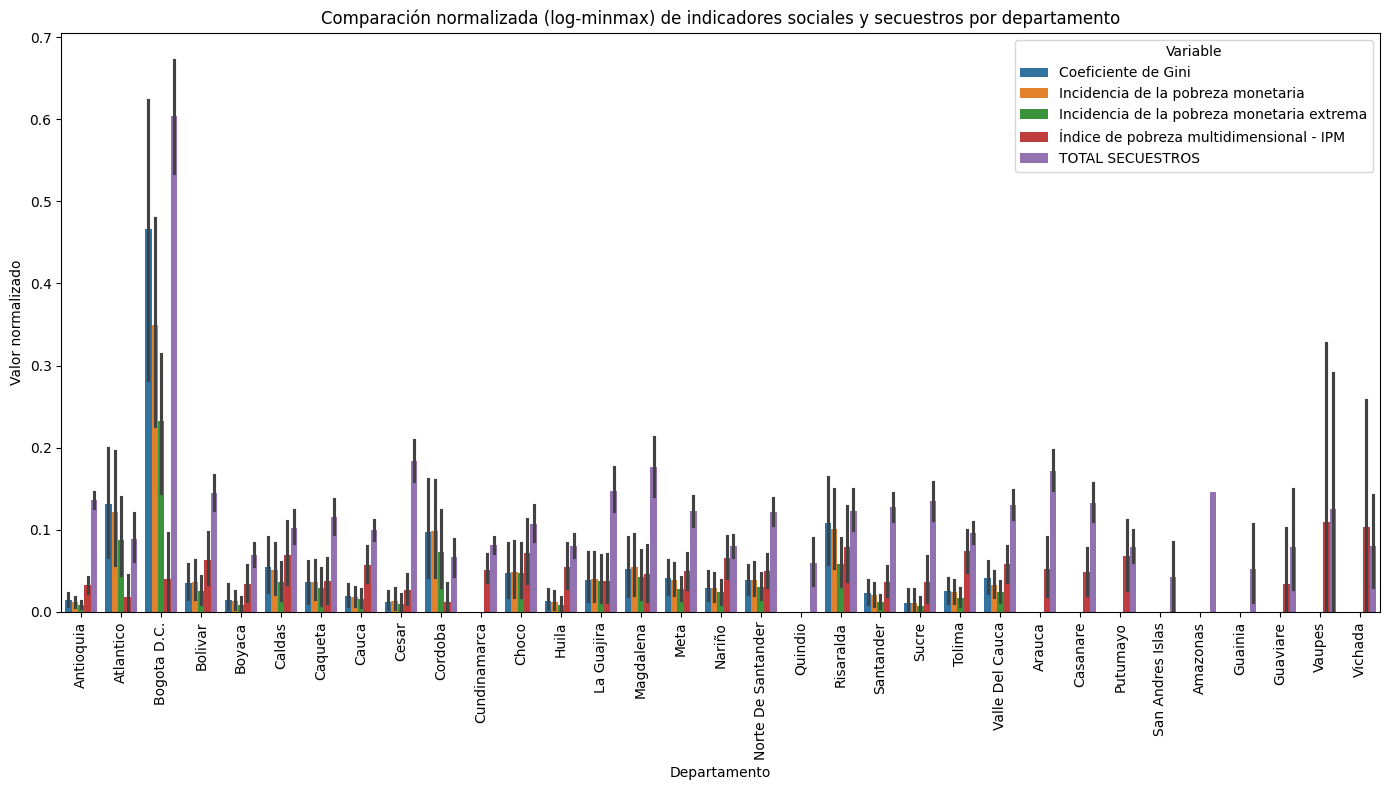

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Copia tu DataFrame base
df = MERGE3_IPM.copy()

# Seleccionar las columnas de interés
variables = [
    'Coeficiente de Gini',
    'Incidencia de la pobreza monetaria',
    'Incidencia de la pobreza monetaria extrema',
    'Índice de pobreza multidimensional - IPM',
    'TOTAL SECUESTROS'
]

# Aplicar logaritmo (log1p) y luego min-max normalization
df_normalizado = df.copy()
for var in variables:
    df_normalizado[var] = np.log1p(df_normalizado[var])
    min_val = df_normalizado[var].min()
    max_val = df_normalizado[var].max()
    df_normalizado[var] = (df_normalizado[var] - min_val) / (max_val - min_val)

# Reformatear el DataFrame para plot (formato largo)
df_melt = df_normalizado.melt(
    id_vars='departamento',
    value_vars=variables,
    var_name='Variable',
    value_name='Valor normalizado'
)

# Ordenar por nombre de departamento
df_melt['departamento'] = df_melt['departamento'].str.title()

# Crear gráfico
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_melt,
    x='departamento',
    y='Valor normalizado',
    hue='Variable'
)

plt.title('Comparación normalizada (log-minmax) de indicadores sociales y secuestros por departamento')
plt.xlabel('Departamento')
plt.ylabel('Valor normalizado')
plt.xticks(rotation=90)
plt.legend(title='Variable')
plt.tight_layout()
plt.show()


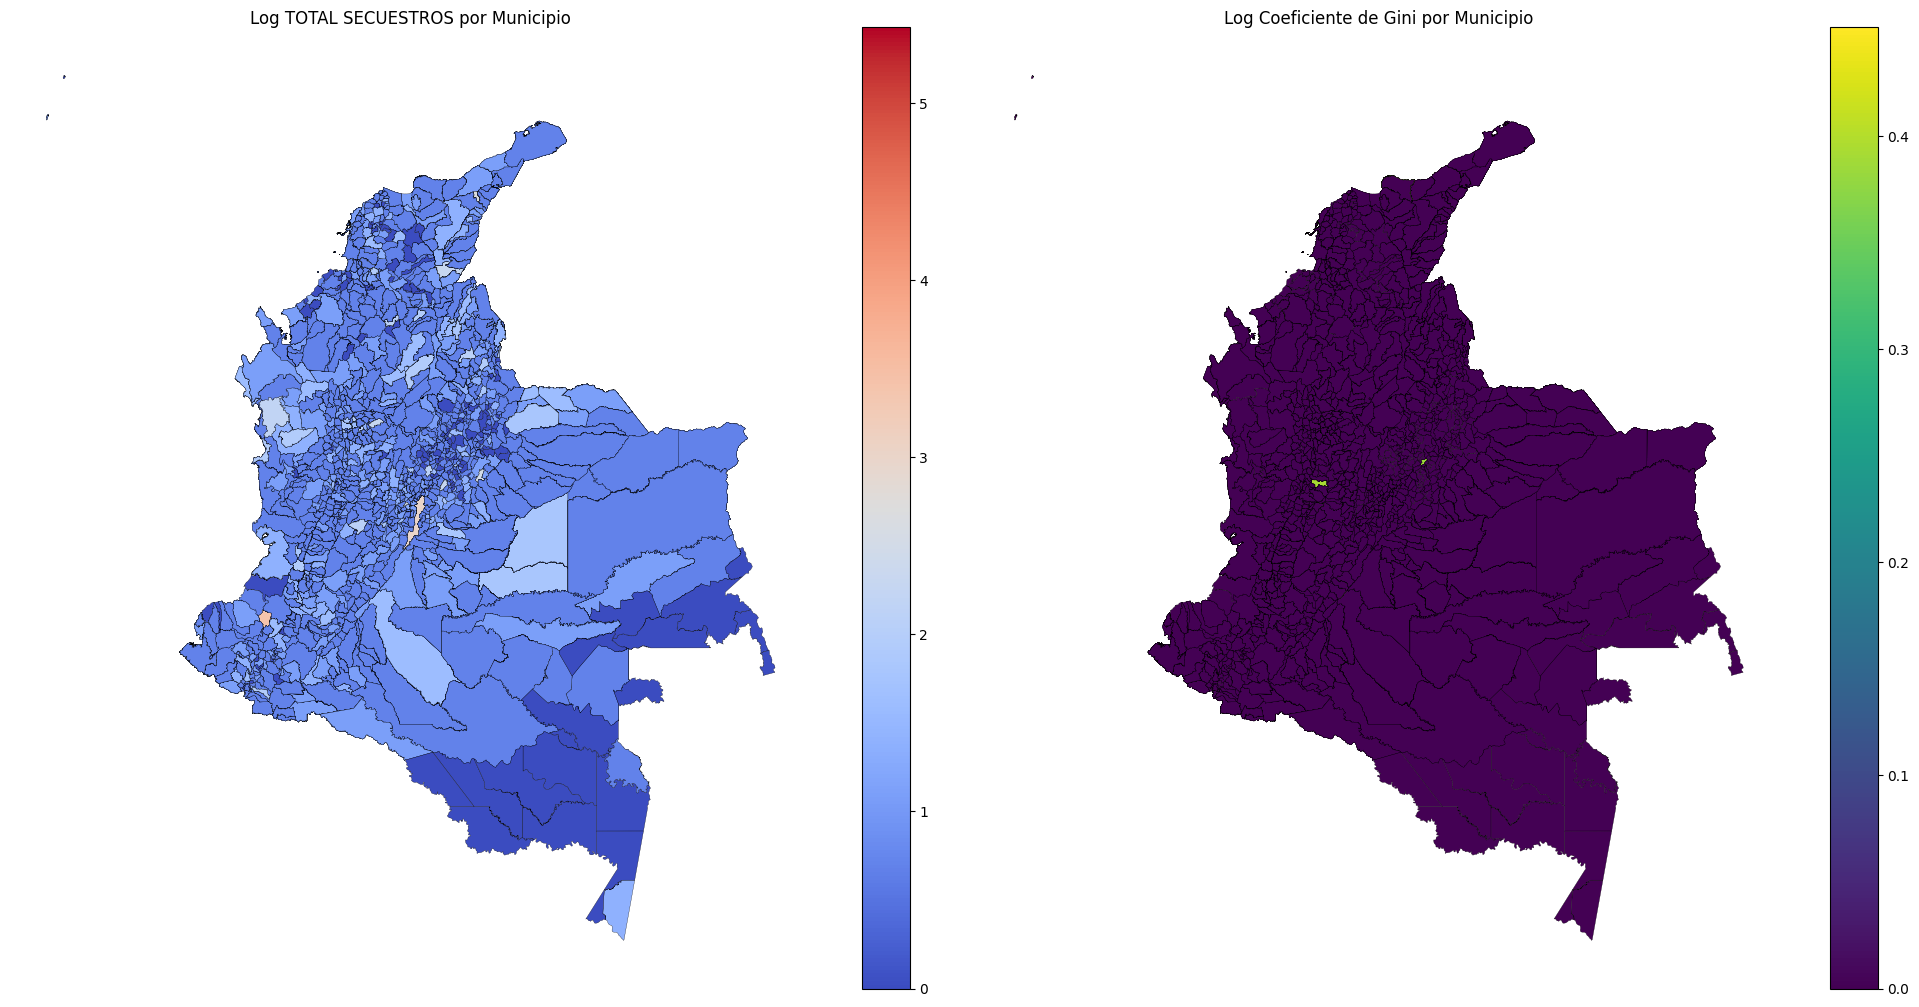

: 

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Crear variable codificada desde los 5 primeros dígitos de 'key'
MERGE3_IPM['cod_muni'] = MERGE3_IPM['key'].astype(str).str[:5]

# Paso 2: Asegurar que el código del shapefile también esté en formato string y zfill
gdf['cod_muni'] = gdf['mpio_cdpmp'].astype(str).str.zfill(5)

# Paso 3: Merge del shapefile con los datos
gdf_merged = gdf.merge(MERGE3_IPM[['cod_muni', 'TOTAL SECUESTROS', 'Coeficiente de Gini']],
                       on='cod_muni', how='left')

# Paso 4: Rellenar valores faltantes con 0
gdf_merged['TOTAL SECUESTROS'] = gdf_merged['TOTAL SECUESTROS'].fillna(0)
gdf_merged['Coeficiente de Gini'] = gdf_merged['Coeficiente de Gini'].fillna(0)

# Paso 5: Normalizar valores con log
import numpy as np
gdf_merged['log_secuestros'] = np.log1p(gdf_merged['TOTAL SECUESTROS'])
gdf_merged['log_gini'] = np.log1p(gdf_merged['Coeficiente de Gini'])

# Paso 6: Graficar con matplotlib (liviano)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

gdf_merged.plot(column='log_secuestros',
                cmap='coolwarm',
                linewidth=0.2,
                edgecolor='black',
                legend=True,
                ax=axes[0])
axes[0].set_title('Log TOTAL SECUESTROS por Municipio')
axes[0].axis('off')

gdf_merged.plot(column='log_gini',
                cmap='viridis',
                linewidth=0.2,
                edgecolor='black',
                legend=True,
                ax=axes[1])
axes[1].set_title('Log Coeficiente de Gini por Municipio')
axes[1].axis('off')

plt.tight_layout()
plt.show()


CULTIVOS COCA

In [95]:
ruta = '/Users/mac/Library/CloudStorage/OneDrive-UniversidadExternadodeColombia/MINE/segundo semestre/Seminario/Mi_primer_proyecto/Datos/duplicados_key_cultivos_coca.csv'
df_cultivos = pd.read_csv(ruta)



In [96]:
# Obtener las keys únicas de cada DataFrame
keys_cultivo = set(df_cultivos['key'].unique())
keys_final2 = set(MERGE3['key'].unique())

# Keys que están en ambos
keys_comunes = keys_cultivo & keys_final2
print(f"Total de keys en común: {len(keys_comunes)}")


Total de keys en común: 3559


In [97]:
df_cultivos = df_cultivos.rename(columns={'Dato Numérico': 'CULTIVOS_COCA'})


In [98]:
MERGE4 = MERGE3.merge(df_cultivos, on='key', how='left')


In [99]:
MERGE4 = MERGE4.fillna(0)
MERGE4.columns

Index(['key', 'municipio', 'departamento', 'ano', 'mes', 'fecha_hecho',
       'cod_muni', 'SECUESTRO EXTORSIVO', 'SECUESTRO SIMPLE',
       'TOTAL SECUESTROS', 'POB_CABECERA', 'POB_RURAL', 'POB_TOTAL',
       'Tasa_100_habitantes', 'periodo', 'AñoMes', 'ASESINATOS',
       'Coeficiente de Gini', 'Incidencia de la pobreza monetaria',
       'Incidencia de la pobreza monetaria extrema',
       'Población en condición de miseria',
       'Índice de pobreza multidimensional - IPM', 'CULTIVOS_COCA'],
      dtype='object')

DATA FRAME CON SOLO CULTIVOS

In [100]:
MERGE4_CULTIVOS = MERGE1.merge(df_cultivos, on='key', how='left')
MERGE4_CULTIVOS = MERGE4_CULTIVOS.fillna(0)
MERGE4_CULTIVOS

key municipio departamento   ano  mes fecha_hecho cod_muni  \
0     05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06    05001   
1     05001-1997  MEDELLIN    ANTIOQUIA  1997    1  1997-01-22    05001   
2     05001-1998  MEDELLIN    ANTIOQUIA  1998    1  1998-01-05    05001   
3     05001-1999  MEDELLIN    ANTIOQUIA  1999    1  1999-01-10    05001   
4     05001-2000  MEDELLIN    ANTIOQUIA  2000    1  2000-01-03    05001   
...          ...       ...          ...   ...  ...         ...      ...   
6595  99773-2003  CUMARIBO      VICHADA  2003    2  2003-02-19    99773   
6596  99773-2005  CUMARIBO      VICHADA  2005    6  2005-06-25    99773   
6597  99773-2006  CUMARIBO      VICHADA  2006    9  2006-09-11    99773   
6598  99773-2011  CUMARIBO      VICHADA  2011    3  2011-03-08    99773   
6599  99773-2013  CUMARIBO      VICHADA  2013    9  2013-09-18    99773   

      SECUESTRO EXTORSIVO  SECUESTRO SIMPLE  TOTAL SECUESTROS  POB_CABECERA  \
0                    73.0               8.0              81.0       1735720   
1                    55.0              19.0              74.0       1764426   
2                    60.0              21.0              81.0       1795878   
3                    78.0              26.0             104.0       1826719   
4                    66.0              53.0             119.0       1857106   
...                   ...               ...               ...           ...   
6595                  3.0               0.0               3.0          2133   
6596                  0.0               1.0               1.0          2270   
6597                  0.0               1.0               1.0          2333   
6598                  1.0               0.0               1.0          2613   
6599                  0.0               1.0               1.0          2696   

      POB_RURAL  POB_TOTAL  Tasa_100_habitantes  periodo   AñoMes  \
0         52111    1787831             4.530630     1995  1996-01   
1         51875    1816301             4.074215     1995  1997-01   
2         51513    1847391             4.384562     1995  1998-01   
3         51146    1877865             5.538204     1995  1999-01   
4         50753    1907859             6.237358     2000  2000-01   
...         ...        ...                  ...      ...      ...   
6595      41715      43848             6.841817     2000  2003-02   
6596      45141      47411             2.109215     2005  2005-06   
6597      46873      49206             2.032272     2005  2006-09   
6598      56115      58728             1.702765     2010  2011-03   
6599      59875      62571             1.598184     2010  2013-09   

      CULTIVOS_COCA  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
6595            0.0  
6596            0.0  
6597            0.0  
6598            0.0  
6599          710.0  

[6600 rows x 17 columns]

GRAFICA DE CULTIVOS

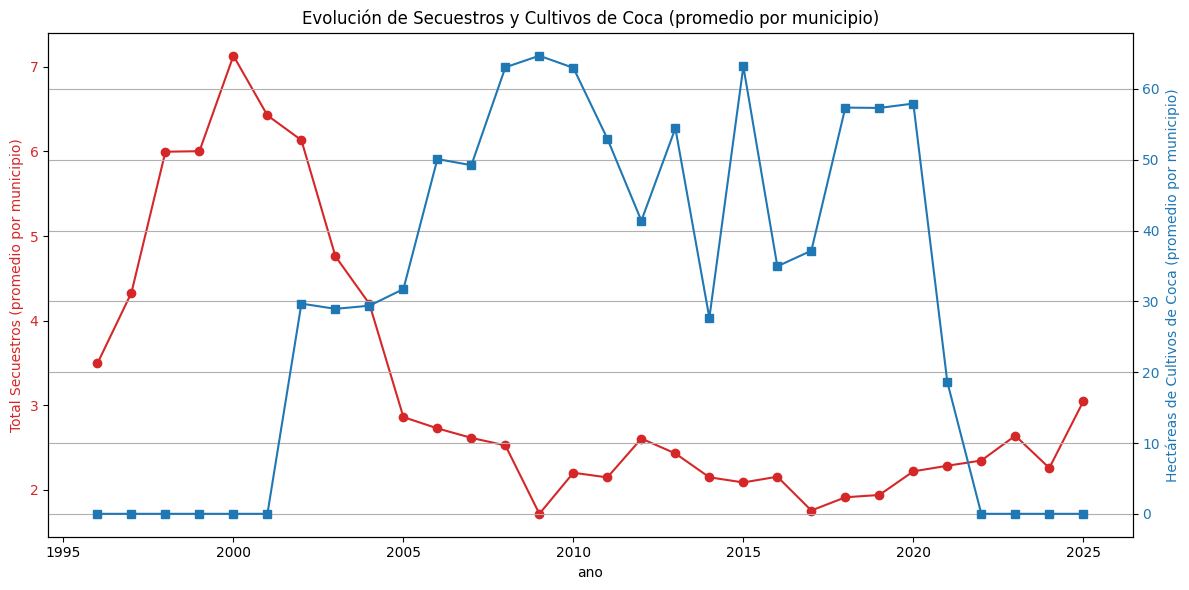

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar nombres consistentes
MERGE4_CULTIVOS.columns = MERGE4_CULTIVOS.columns.str.strip()

# Agrupar por ano y calcular promedio por municipio
df_tiempo = MERGE4_CULTIVOS.groupby('ano')[['TOTAL SECUESTROS', 'CULTIVOS_COCA']].mean().reset_index()

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primer eje Y - Total Secuestros
color = 'tab:red'
ax1.set_xlabel('ano')
ax1.set_ylabel('Total Secuestros (promedio por municipio)', color=color)
ax1.plot(df_tiempo['ano'], df_tiempo['TOTAL SECUESTROS'], marker='o', color=color, label='Total Secuestros')
ax1.tick_params(axis='y', labelcolor=color)

# Segundo eje Y - Cultivos de Coca
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Hectáreas de Cultivos de Coca (promedio por municipio)', color=color)
ax2.plot(df_tiempo['ano'], df_tiempo['CULTIVOS_COCA'], marker='s', color=color, label='Cultivos de Coca')
ax2.tick_params(axis='y', labelcolor=color)

# Título y formato
plt.title('Evolución de Secuestros y Cultivos de Coca (promedio por municipio)')
fig.tight_layout()
plt.grid(True)
plt.show()


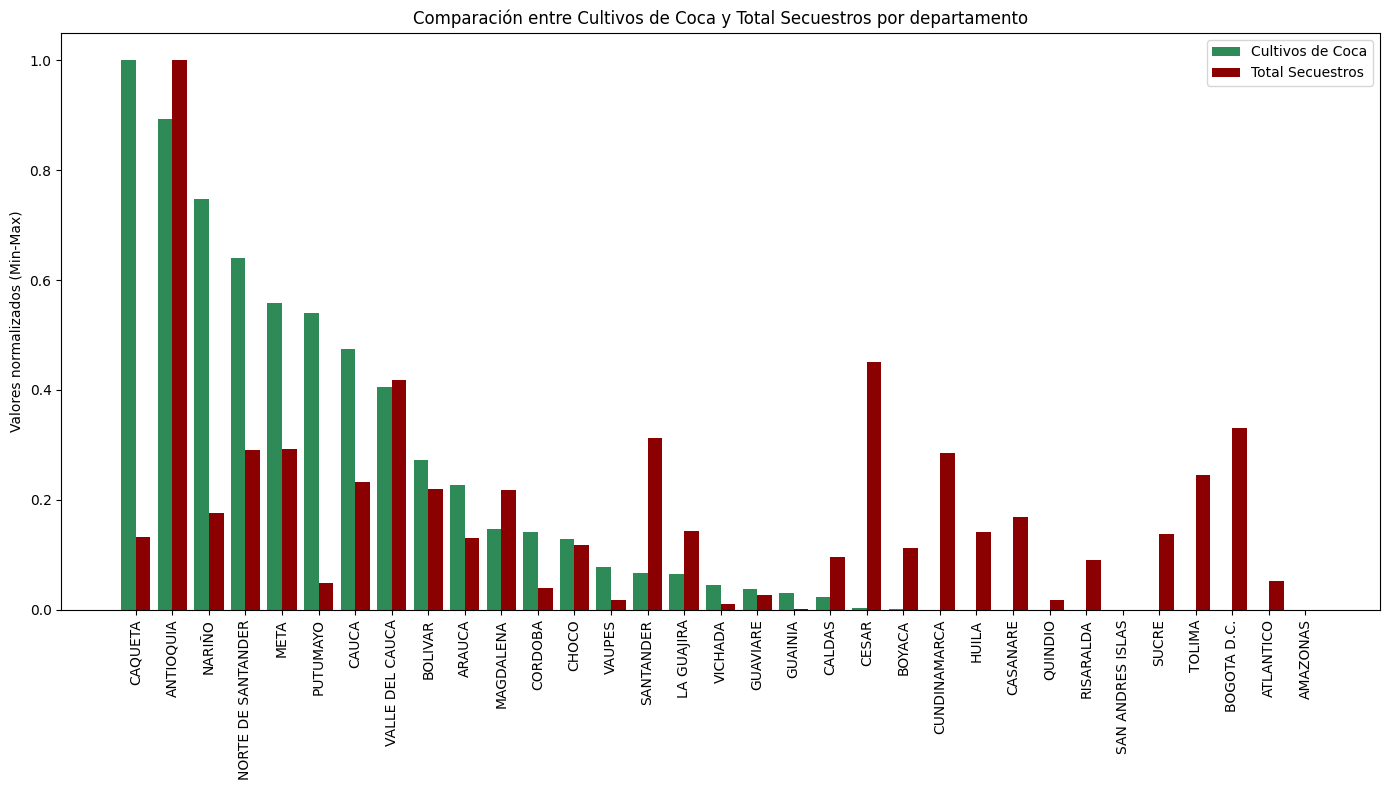

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Copiar datos y agrupar por departamento
df = MERGE4_CULTIVOS.copy()
df_grouped = df.groupby('departamento')[['CULTIVOS_COCA', 'TOTAL SECUESTROS']].sum()

# Normalizar para poder comparar escalas distintas
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_grouped),
    columns=df_grouped.columns,
    index=df_grouped.index
)

# Ordenar por CULTIVOS_COCA para visualización
df_scaled = df_scaled.sort_values('CULTIVOS_COCA', ascending=False)

# Crear gráfico
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.4
index = range(len(df_scaled))

ax.bar(index, df_scaled['CULTIVOS_COCA'], width=bar_width, label='Cultivos de Coca', color='seagreen')
ax.bar([i + bar_width for i in index], df_scaled['TOTAL SECUESTROS'], width=bar_width, label='Total Secuestros', color='darkred')

# Ajustes de etiquetas y formato
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(df_scaled.index, rotation=90)
ax.set_ylabel('Valores normalizados (Min-Max)')
ax.set_title('Comparación entre Cultivos de Coca y Total Secuestros por departamento')
ax.legend()
plt.tight_layout()
plt.show()


/var/folders/qz/g5m1ndq17q7_y3lpcdy5s2nh0000gn/T/ipykernel_1724/3648696249.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




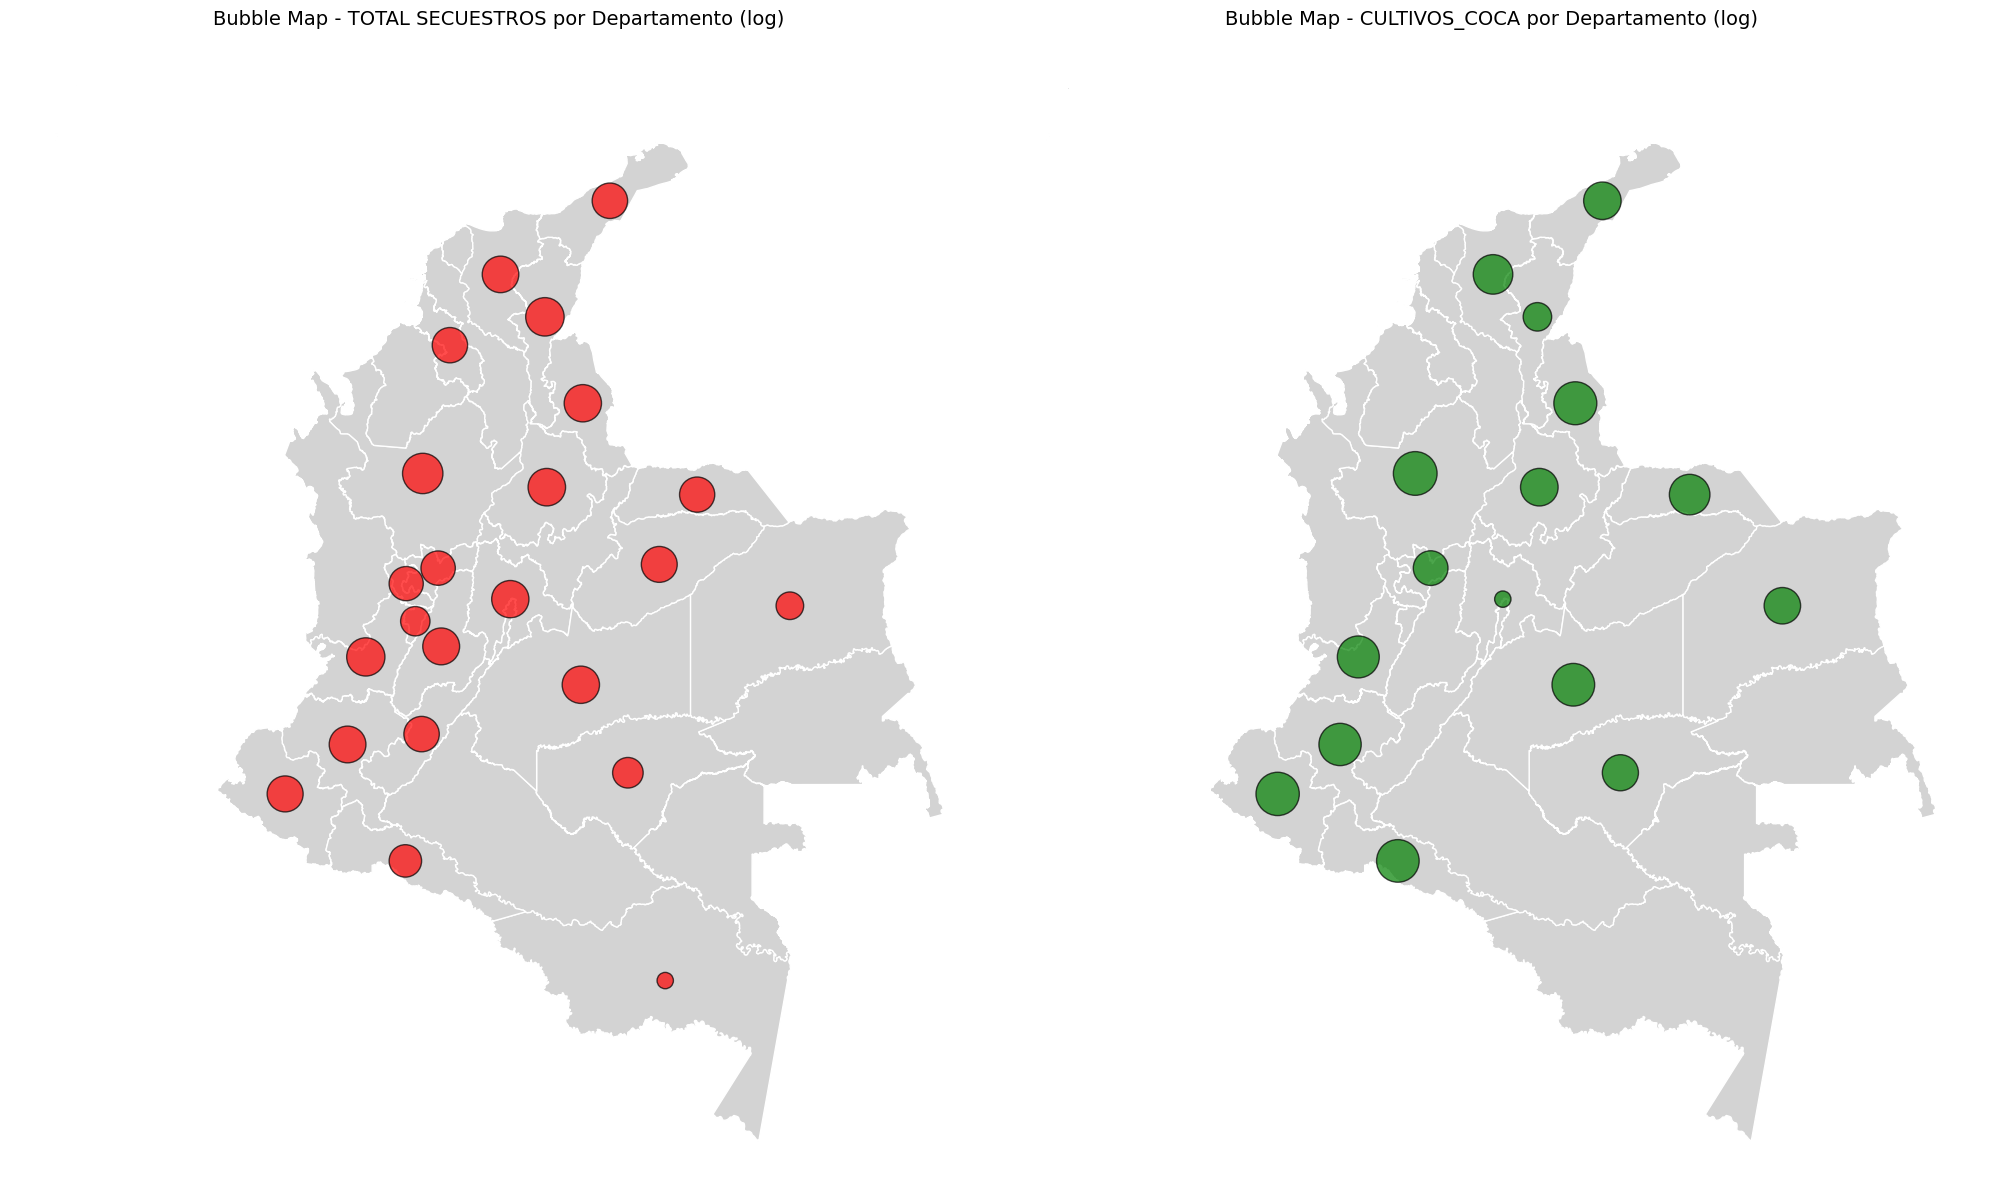

In [104]:


# Asegurar que el código del departamento esté en ambas bases
MERGE4_CULTIVOS['departamento'] = MERGE4_CULTIVOS['departamento'].str.upper()

# Agrupar por departamento
resumen_dpto = MERGE4_CULTIVOS.groupby('departamento')[['TOTAL SECUESTROS', 'CULTIVOS_COCA']].sum().reset_index()

# Unir con shapefile por nombre de departamento
gdf_dpto = gdf.dissolve(by='dpto_cnmbr', as_index=False)
gdf_dpto['dpto_cnmbr'] = gdf_dpto['dpto_cnmbr'].str.upper()

gdf_bubble_dpto = gdf_dpto.merge(resumen_dpto, left_on='dpto_cnmbr', right_on='departamento', how='left')

# Llenar NaN
gdf_bubble_dpto[['TOTAL SECUESTROS', 'CULTIVOS_COCA']] = gdf_bubble_dpto[['TOTAL SECUESTROS', 'CULTIVOS_COCA']].fillna(0)

# Centroides
gdf_bubble_dpto['coords'] = gdf_bubble_dpto['geometry'].centroid
gdf_bubble_dpto['x'] = gdf_bubble_dpto['coords'].x
gdf_bubble_dpto['y'] = gdf_bubble_dpto['coords'].y

# Normalizar tamaño (log)
gdf_bubble_dpto['size_secuestros'] = np.log1p(gdf_bubble_dpto['TOTAL SECUESTROS']) * 100
gdf_bubble_dpto['size_coca'] = np.log1p(gdf_bubble_dpto['CULTIVOS_COCA']) * 100

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Mapa base
gdf_dpto.plot(ax=axes[0], color='lightgrey', edgecolor='white')
gdf_dpto.plot(ax=axes[1], color='lightgrey', edgecolor='white')

# Mapa Secuestros
axes[0].scatter(
    gdf_bubble_dpto['x'], gdf_bubble_dpto['y'],
    s=gdf_bubble_dpto['size_secuestros'],
    color='red', alpha=0.7, edgecolor='black'
)
axes[0].set_title('Bubble Map - TOTAL SECUESTROS por Departamento (log)', fontsize=14)
axes[0].axis('off')

# Mapa Coca
axes[1].scatter(
    gdf_bubble_dpto['x'], gdf_bubble_dpto['y'],
    s=gdf_bubble_dpto['size_coca'],
    color='green', alpha=0.7, edgecolor='black'
)
axes[1].set_title('Bubble Map - CULTIVOS_COCA por Departamento (log)', fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()


DESAPARICIÓN FORZADA

In [105]:
DF_DESAPARICION = pd.read_excel("/Users/mac/Library/CloudStorage/OneDrive-UniversidadExternadodeColombia/MINE/segundo semestre/Seminario/Mi_primer_proyecto/Datos/CasosDF_202503.xlsx")

/opt/miniconda3/envs/secuestro/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [106]:
# Eliminar columnas no deseadas incluyendo 'ID Caso Relacionado'
DF_DESAPARICION = DF_DESAPARICION.drop(columns=[
    'ID Caso Relacionado',
    'Región',
    'Descripción Presunto Responsable',
    'Tipo de Armas',
    'Latitud',
    'Longitud', 
    'ID Caso', 
    'Violencia Basada en Género'
])


In [107]:
# Filtrar solo filas donde 'Código DANE de Municipio' sea numérico
DF_DESAPARICION = DF_DESAPARICION[
    DF_DESAPARICION['Código DANE de Municipio'].apply(lambda x: str(x).isnumeric())
].copy()

# Convertir a string con ceros a la izquierda (5 dígitos)
DF_DESAPARICION['cod_muni'] = DF_DESAPARICION['Código DANE de Municipio'].astype(int).astype(str).str.zfill(5)

# Eliminar filas basura o encabezados repetidos
DF_DESAPARICION = DF_DESAPARICION[DF_DESAPARICION['Código DANE de Municipio'].notna()].copy()

# Normalizar código municipio y año
DF_DESAPARICION['cod_muni'] = DF_DESAPARICION['Código DANE de Municipio'].astype(int).astype(str).str.zfill(5)
DF_DESAPARICION['Año'] = DF_DESAPARICION['Año'].astype(int)

# Crear clave para merge
DF_DESAPARICION['key'] = DF_DESAPARICION['cod_muni'] + '-' + DF_DESAPARICION['Año'].astype(str)



In [202]:
# Agrupar por key y sumar víctimas
df_desaparicion_suma = DF_DESAPARICION.groupby('key', as_index=False)[['Total de Víctimas del Caso']].sum()

# Cambiar nombre a TOTAL_DESAPARICION
df_desaparicion_suma.rename(columns={'Total de Víctimas del Caso': 'TOTAL_DESAPARICION'}, inplace=True)


In [203]:
# Unir con MERGE4
MERGE5 = MERGE4.merge(df_desaparicion_suma, on='key', how='left')

# Reemplazar NaN con 0
MERGE5['TOTAL_DESAPARICION'] = MERGE5['TOTAL_DESAPARICION'].fillna(0)



MERGED CON SOLO DESAPARICION

In [204]:
MERGE5_DESAPARICION = MERGE1.merge(DF_DESAPARICION, on='key', how='left')
MERGE5_DESAPARICION = MERGE5_DESAPARICION.fillna(0)
MERGE5_DESAPARICION

key municipio departamento   ano  mes fecha_hecho cod_muni_x  \
0      05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      05001   
1      05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      05001   
2      05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      05001   
3      05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      05001   
4      05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      05001   
...           ...       ...          ...   ...  ...         ...        ...   
35727  99773-2006  CUMARIBO      VICHADA  2006    9  2006-09-11      99773   
35728  99773-2006  CUMARIBO      VICHADA  2006    9  2006-09-11      99773   
35729  99773-2011  CUMARIBO      VICHADA  2011    3  2011-03-08      99773   
35730  99773-2011  CUMARIBO      VICHADA  2011    3  2011-03-08      99773   
35731  99773-2013  CUMARIBO      VICHADA  2013    9  2013-09-18      99773   

       SECUESTRO EXTORSIVO  SECUESTRO SIMPLE  TOTAL SECUESTROS  ...  \
0                     73.0               8.0              81.0  ...   
1                     73.0               8.0              81.0  ...   
2                     73.0               8.0              81.0  ...   
3                     73.0               8.0              81.0  ...   
4                     73.0               8.0              81.0  ...   
...                    ...               ...               ...  ...   
35727                  0.0               1.0               1.0  ...   
35728                  0.0               1.0               1.0  ...   
35729                  1.0               0.0               1.0  ...   
35730                  1.0               0.0               1.0  ...   
35731                  0.0               1.0               1.0  ...   

       Ataque Contra Misión Médica  \
0                              0.0   
1                              0.0   
2                              0.0   
3                              0.0   
4                              0.0   
...                            ...   
35727                          0.0   
35728                          0.0   
35729                          0.0   
35730                          0.0   
35731                          0.0   

       Confinamiento o Restricción a la Movilidad  Desplazamiento Forzado  \
0                                             0.0                     0.0   
1                                             0.0                     0.0   
2                                             0.0                     0.0   
3                                             0.0                     0.0   
4                                             0.0                     0.0   
...                                           ...                     ...   
35727                                         0.0                     0.0   
35728                                         0.0                     0.0   
35729                                         0.0                     0.0   
35730                                         0.0                     0.0   
35731                                         0.0                     0.0   

       Extorsión  Lesionados Civiles Pillaje Tortura  Otro Hecho Simultáneo  \
0            0.0                 0.0     0.0     0.0                      0   
1            0.0                 0.0     0.0     0.0                      0   
2            0.0                 0.0     0.0     0.0                      0   
3            0.0                 0.0     0.0     0.0                      0   
4            0.0                 0.0     0.0     0.0                      0   
...          ...                 ...     ...     ...                    ...   
35727        0.0                 0.0     0.0     0.0                      0   
35728        0.0                 0.0     0.0     0.0                      0   
35729        0.0                 0.0     0.0     0.0                      0   
35730        0.0                 0.0     0.0     0.0

- GRAFICO DESAPARACION

In [110]:
MERGE5_DESAPARICION

key municipio departamento   ano  mes fecha_hecho cod_muni_x  \
0      05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      05001   
1      05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      05001   
2      05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      05001   
3      05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      05001   
4      05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06      05001   
...           ...       ...          ...   ...  ...         ...        ...   
35727  99773-2006  CUMARIBO      VICHADA  2006    9  2006-09-11      99773   
35728  99773-2006  CUMARIBO      VICHADA  2006    9  2006-09-11      99773   
35729  99773-2011  CUMARIBO      VICHADA  2011    3  2011-03-08      99773   
35730  99773-2011  CUMARIBO      VICHADA  2011    3  2011-03-08      99773   
35731  99773-2013  CUMARIBO      VICHADA  2013    9  2013-09-18      99773   

       SECUESTRO EXTORSIVO  SECUESTRO SIMPLE  TOTAL SECUESTROS  ...  \
0                     73.0               8.0              81.0  ...   
1                     73.0               8.0              81.0  ...   
2                     73.0               8.0              81.0  ...   
3                     73.0               8.0              81.0  ...   
4                     73.0               8.0              81.0  ...   
...                    ...               ...               ...  ...   
35727                  0.0               1.0               1.0  ...   
35728                  0.0               1.0               1.0  ...   
35729                  1.0               0.0               1.0  ...   
35730                  1.0               0.0               1.0  ...   
35731                  0.0               1.0               1.0  ...   

       Ataque Contra Misión Médica  \
0                              0.0   
1                              0.0   
2                              0.0   
3                              0.0   
4                              0.0   
...                            ...   
35727                          0.0   
35728                          0.0   
35729                          0.0   
35730                          0.0   
35731                          0.0   

       Confinamiento o Restricción a la Movilidad  Desplazamiento Forzado  \
0                                             0.0                     0.0   
1                                             0.0                     0.0   
2                                             0.0                     0.0   
3                                             0.0                     0.0   
4                                             0.0                     0.0   
...                                           ...                     ...   
35727                                         0.0                     0.0   
35728                                         0.0                     0.0   
35729                                         0.0                     0.0   
35730                                         0.0                     0.0   
35731                                         0.0                     0.0   

       Extorsión  Lesionados Civiles Pillaje  Tortura  Otro Hecho Simultáneo  \
0            0.0                 0.0     0.0      0.0                      0   
1            0.0                 0.0     0.0      0.0                      0   
2            0.0                 0.0     0.0      0.0                      0   
3            0.0                 0.0     0.0      0.0                      0   
4            0.0                 0.0     0.0      0.0                      0   
...          ...                 ...     ...      ...                    ...   
35727        0.0                 0.0     0.0      0.0                      0   
35728        0.0                 0.0     0.0      0.0                      0   
35729        0.0                 0.0     0.0      0.0                      0   
35730        0.0                 0.0     0

/var/folders/qz/g5m1ndq17q7_y3lpcdy5s2nh0000gn/T/ipykernel_1724/340303342.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




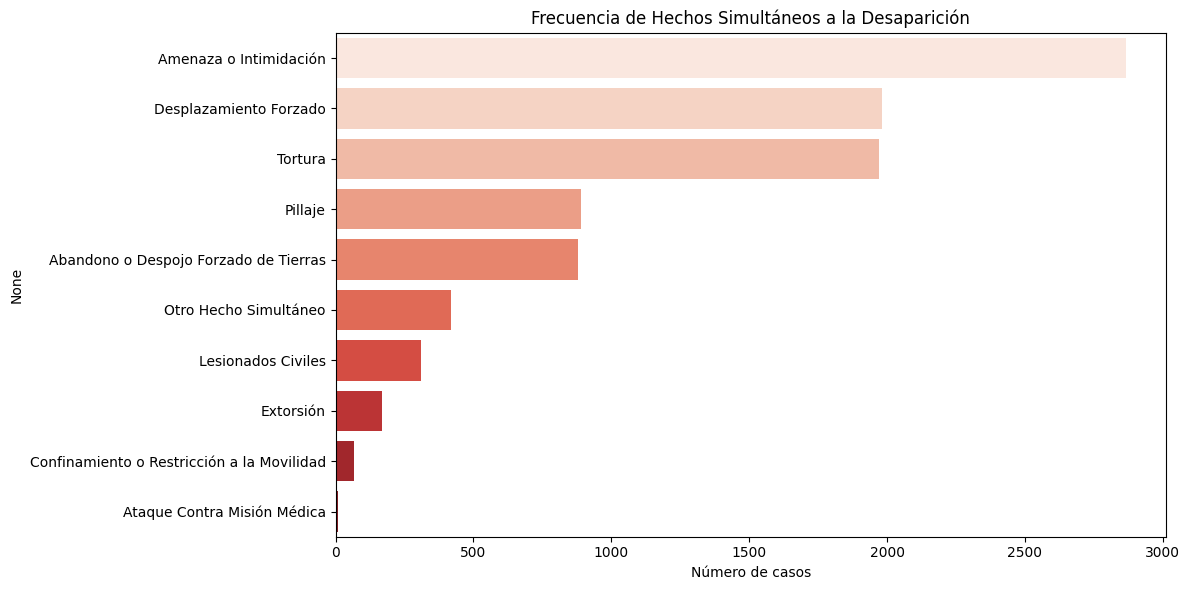

In [111]:
# Selección de variables
hechos = ['Abandono o Despojo Forzado de Tierras', 'Amenaza o Intimidación',
          'Ataque Contra Misión Médica', 'Confinamiento o Restricción a la Movilidad',
          'Desplazamiento Forzado', 'Extorsión', 'Lesionados Civiles',
          'Pillaje', 'Tortura', 'Otro Hecho Simultáneo']

# Conteo de ocurrencias (asumiendo que 1 indica que ocurrió)
conteo_hechos = MERGE5_DESAPARICION[hechos].fillna(0).astype(bool).sum().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(x=conteo_hechos.values, y=conteo_hechos.index, palette='Reds')
plt.title('Frecuencia de Hechos Simultáneos a la Desaparición')
plt.xlabel('Número de casos')
plt.tight_layout()
plt.show()


In [112]:
MERGE5_DESAPARICION.columns

Index(['key', 'municipio', 'departamento', 'ano', 'mes', 'fecha_hecho',
       'cod_muni_x', 'SECUESTRO EXTORSIVO', 'SECUESTRO SIMPLE',
       'TOTAL SECUESTROS', 'POB_CABECERA', 'POB_RURAL', 'POB_TOTAL',
       'Tasa_100_habitantes', 'periodo', 'AñoMes', 'Año', 'Mes', 'Día',
       'Código DANE de Municipio', 'Municipio', 'Departamento', 'Modalidad',
       'Presunto Responsable', 'Abandono o Despojo Forzado de Tierras',
       'Amenaza o Intimidación', 'Ataque Contra Misión Médica',
       'Confinamiento o Restricción a la Movilidad', 'Desplazamiento Forzado',
       'Extorsión', 'Lesionados Civiles', 'Pillaje', 'Tortura',
       'Otro Hecho Simultáneo', 'Total de Víctimas del Caso', 'cod_muni_y'],
      dtype='object')

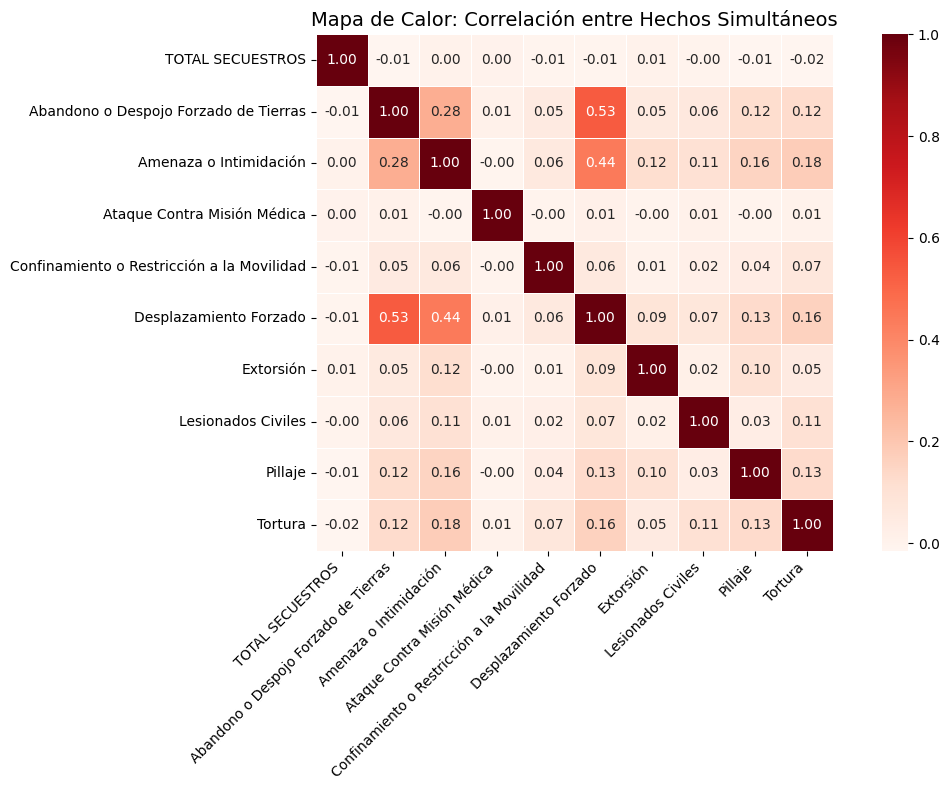

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Lista original de posibles hechos simultáneos
hechos = [
    'TOTAL SECUESTROS', 'Modalidad',
       'Presunto Responsable','Abandono o Despojo Forzado de Tierras',
    'Amenaza o Intimidación',
    'Ataque Contra Misión Médica',
    'Confinamiento o Restricción a la Movilidad',
    'Desplazamiento Forzado',
    'Extorsión',
    'Lesionados Civiles',
    'Pillaje',
    'Tortura',
    'Otro Hecho Simultáneo'
]

# Filtrar columnas que existen y son numéricas
hechos_validos = [col for col in hechos if pd.api.types.is_numeric_dtype(MERGE5_DESAPARICION[col])]

# Crear subdataframe con solo columnas válidas
df_hechos = MERGE5_DESAPARICION[hechos_validos].fillna(0).astype(float)

# Matriz de correlación
correlacion = df_hechos.corr()

# Graficar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5, square=True)
plt.title("Mapa de Calor: Correlación entre Hechos Simultáneos", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [114]:
MERGE5_DESAPARICION[['TOTAL SECUESTROS', 'Modalidad',
       'Presunto Responsable', 'Abandono o Despojo Forzado de Tierras',
       'Amenaza o Intimidación', 'Ataque Contra Misión Médica',
       'Confinamiento o Restricción a la Movilidad', 'Desplazamiento Forzado',
       'Extorsión', 'Lesionados Civiles', 'Pillaje', 'Tortura',
       'Otro Hecho Simultáneo', 'Total de Víctimas del Caso']]

TOTAL SECUESTROS    Modalidad          Presunto Responsable  \
0                  81.0  DESCONOCIDA                   DESCONOCIDO   
1                  81.0  DESCONOCIDA                   DESCONOCIDO   
2                  81.0  DESCONOCIDA  GRUPO ARMADO NO IDENTIFICADO   
3                  81.0  DESCONOCIDA                   DESCONOCIDO   
4                  81.0  DESCONOCIDA                     GUERRILLA   
...                 ...          ...                           ...   
35727               1.0       ASALTO                     GUERRILLA   
35728               1.0       ASALTO                     GUERRILLA   
35729               1.0  DESCONOCIDA      GRUPO POSDESMOVILIZACIÓN   
35730               1.0  DESCONOCIDA  GRUPO ARMADO NO IDENTIFICADO   
35731               1.0            0                             0   

       Abandono o Despojo Forzado de Tierras  Amenaza o Intimidación  \
0                                        0.0                     0.0   
1                                        0.0                     0.0   
2                                        0.0                     0.0   
3                                        0.0                     0.0   
4                                        0.0                     0.0   
...                                      ...                     ...   
35727                                    0.0                     0.0   
35728                                    0.0                     0.0   
35729                                    0.0                     0.0   
35730                                    0.0                     0.0   
35731                                    0.0                     0.0   

       Ataque Contra Misión Médica  \
0                              0.0   
1                              0.0   
2                              0.0   
3                              0.0   
4                              0.0   
...                            ...   
35727                          0.0   
35728                          0.0   
35729                          0.0   
35730                          0.0   
35731                          0.0   

       Confinamiento o Restricción a la Movilidad  Desplazamiento Forzado  \
0                                             0.0                     0.0   
1                                             0.0                     0.0   
2                                             0.0                     0.0   
3                                             0.0                     0.0   
4                                             0.0                     0.0   
...                                           ...                     ...   
35727                                         0.0                     0.0   
35728                                         0.0                     0.0   
35729                                         0.0                     0.0   
35730                                         0.0                     0.0   
35731                                         0.0                     0.0   

       Extorsión  Lesionados Civiles  Pillaje  Tortura Otro Hecho Simultáneo  \
0            0.0                 0.0      0.0      0.0                     0   
1            0.0                 0.0      0.0      0.0                     0   
2            0.0                 0.0      0.0      0.0                     0   
3            0.0                 0.0      0.0      0.0                     0   
4            0.0                 0.0      0.0      0.0                     0   
...          ...                 ...      ...      ...                   ...   
35727        0.0                 0.0      0.0      0.0                     0   
35728        0.0                 0.0      0.0      0.0                     0   
35729        0.0                 0.0      0.0      0.0                     0   
35730        0.0                 0.0      0.0      0.0                     0   
35731        0.0                 0.0   

/var/folders/qz/g5m1ndq17q7_y3lpcdy5s2nh0000gn/T/ipykernel_1724/1711170328.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




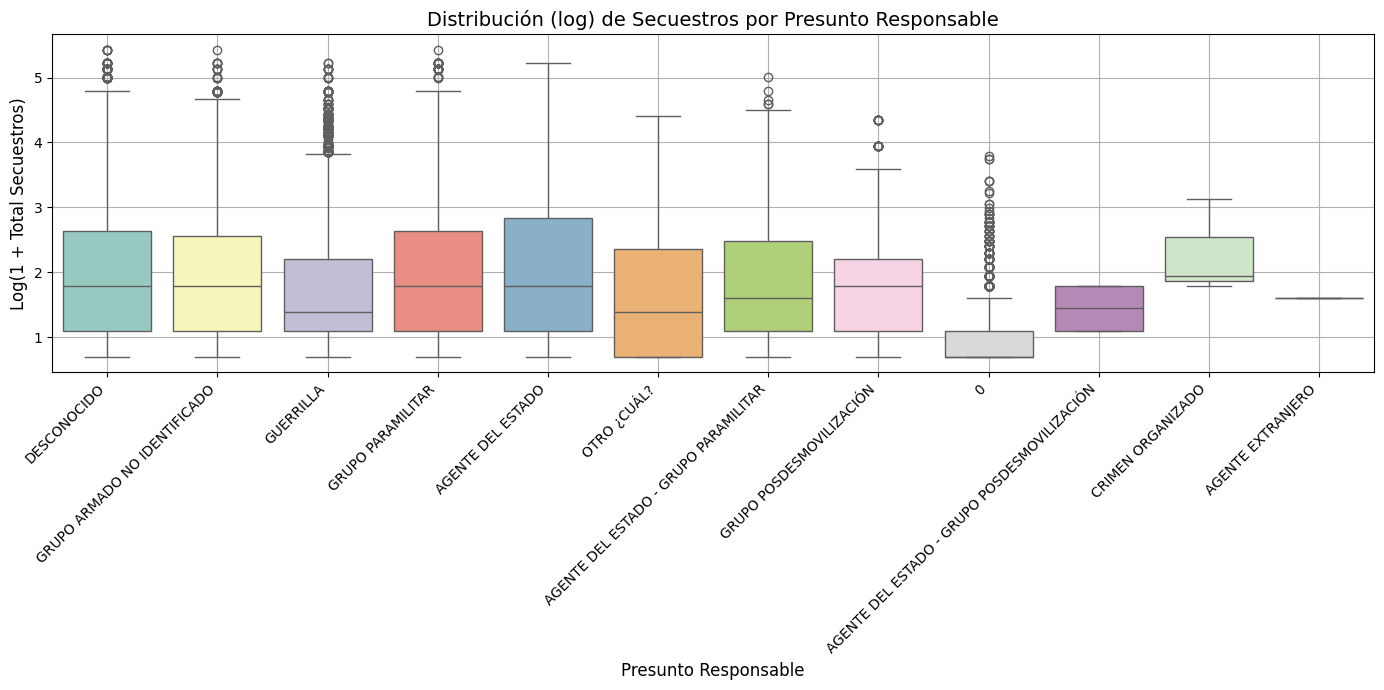

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filtrar columnas necesarias y eliminar nulos
df_boxplot = MERGE5_DESAPARICION[['Presunto Responsable', 'TOTAL SECUESTROS']].dropna()

# Asegurarse de que TOTAL SECUESTROS es numérico
df_boxplot['TOTAL SECUESTROS'] = pd.to_numeric(df_boxplot['TOTAL SECUESTROS'], errors='coerce')
df_boxplot = df_boxplot.dropna()

# Crear columna con log(1 + TOTAL SECUESTROS)
df_boxplot['LOG_TOTAL_SECUESTROS'] = np.log1p(df_boxplot['TOTAL SECUESTROS'])

# Crear el boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df_boxplot,
    x='Presunto Responsable',
    y='LOG_TOTAL_SECUESTROS',
    palette='Set3'
)

plt.title('Distribución (log) de Secuestros por Presunto Responsable', fontsize=14)
plt.ylabel('Log(1 + Total Secuestros)', fontsize=12)
plt.xlabel('Presunto Responsable', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


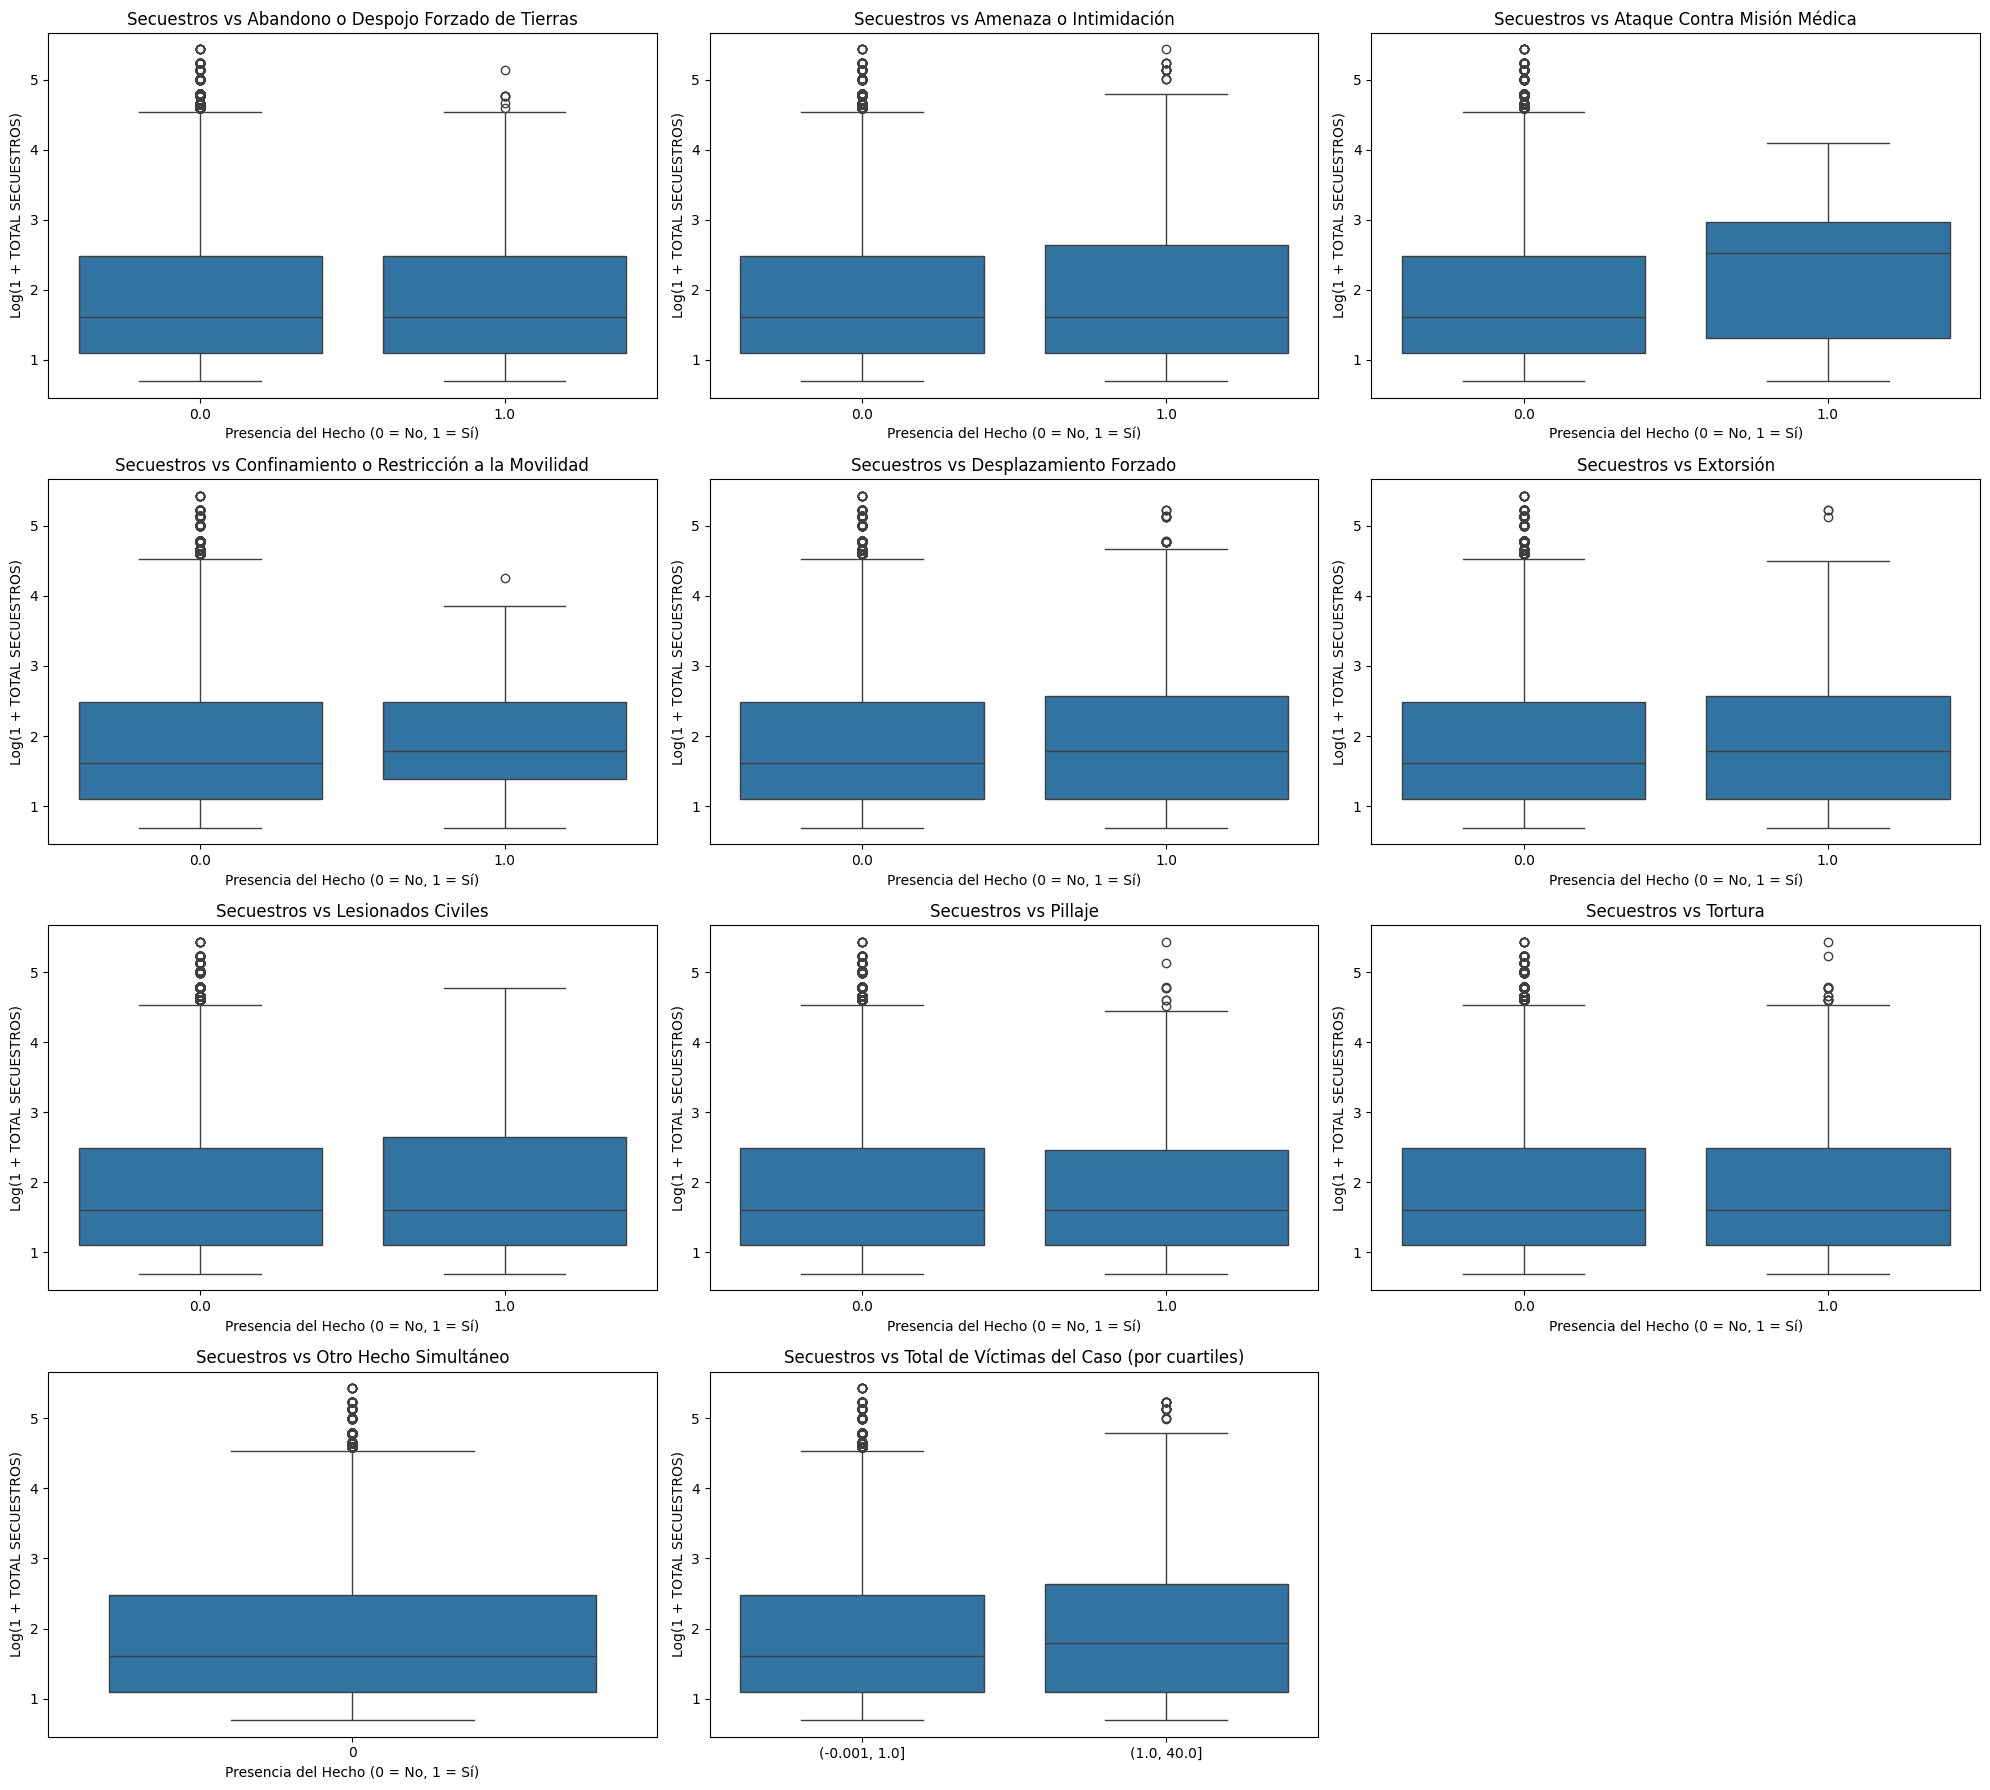

In [117]:


# Copia del DataFrame original
df = MERGE5_DESAPARICION.copy()

# Asegurar que TOTAL SECUESTROS es numérico
df['TOTAL SECUESTROS'] = pd.to_numeric(df['TOTAL SECUESTROS'], errors='coerce')
df = df.dropna(subset=['TOTAL SECUESTROS'])

# Crear la columna con valores normalizados en log
df['log_total_secuestros'] = np.log1p(df['TOTAL SECUESTROS'])

# Lista de hechos simultáneos
hechos_simultaneos = [
    'Abandono o Despojo Forzado de Tierras',
    'Amenaza o Intimidación',
    'Ataque Contra Misión Médica',
    'Confinamiento o Restricción a la Movilidad',
    'Desplazamiento Forzado',
    'Extorsión',
    'Lesionados Civiles',
    'Pillaje',
    'Tortura',
    'Otro Hecho Simultáneo',
    'Total de Víctimas del Caso'  # Esta puede no ser binaria, la tratamos distinta
]

# Ajustar tamaño del gráfico
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 18))
axes = axes.flatten()

# Generar un boxplot por cada variable
for i, var in enumerate(hechos_simultaneos):
    if var == 'Total de Víctimas del Caso':
        # Agrupar en cuartiles si es numérica continua
        df['cuartil_victimas'] = pd.qcut(df[var], q=4, duplicates='drop')
        sns.boxplot(x='cuartil_victimas', y='log_total_secuestros', data=df, ax=axes[i])
        axes[i].set_title(f'Secuestros vs {var} (por cuartiles)')
        axes[i].set_xlabel('')
    else:
        # Asegurar valores 0 o 1 y filtrar nulos
        df_temp = df[df[var].notnull() & df[var].isin([0, 1])]
        sns.boxplot(x=var, y='log_total_secuestros', data=df_temp, ax=axes[i])
        axes[i].set_title(f'Secuestros vs {var}')
        axes[i].set_xlabel('Presencia del Hecho (0 = No, 1 = Sí)')

    axes[i].set_ylabel('Log(1 + TOTAL SECUESTROS)')

# Eliminar el subplot extra si sobra
if len(hechos_simultaneos) < len(axes):
    for j in range(len(hechos_simultaneos), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



<p style="text-align: justify;">
El conjunto de boxplots presentados permite visualizar cómo varía la cantidad de secuestros (en escala logarítmica) según la ocurrencia o no de diversos hechos simultáneos registrados en los casos de desaparición forzada y violencia. En el eje vertical se representa el valor de TOTAL SECUESTROS transformado mediante log(1+x), lo que permite reducir el efecto de los valores extremos y facilitar la comparación entre grupos. En el eje horizontal, cada gráfico compara la distribución de secuestros entre dos grupos: aquellos casos donde no se reportó un hecho específico (valor 0) y aquellos donde sí se reportó (valor 1).
</p>
<p style="text-align: justify;">
De forma general, se observa que en hechos como Amenaza o Intimidación, Desplazamiento Forzado y Extorsión, la mediana del número de secuestros tiende a ser más alta cuando estos hechos ocurren, lo que sugiere una correlación positiva entre su presencia y la cantidad de secuestros registrados. Además, estos mismos hechos presentan una mayor dispersión en sus valores, indicando que en algunos casos particulares se pueden dar niveles de secuestro mucho más elevados que el promedio.
</p>
<p style="text-align: justify;">
Por otro lado, hechos como Ataque Contra Misión Médica, Lesionados Civiles, Tortura o Pillaje también muestran una ligera elevación en la mediana de los secuestros cuando están presentes, pero con una menor diferencia respecto al grupo donde no ocurren. Esto sugiere que, aunque podrían estar relacionados, su impacto en los niveles de secuestros es más moderado o concentrado en casos específicos.
</p>
<p style="text-align: justify;">
En el caso de la variable Total de Víctimas del Caso, que fue segmentada en cuartiles, se evidencia un aumento progresivo en la mediana de secuestros conforme aumenta el número de víctimas involucradas, lo cual es esperable y confirma que los eventos con mayor número de víctimas suelen estar asociados a mayores niveles de secuestro.
</p>
<p style="text-align: justify;">
En resumen, el análisis gráfico sugiere que ciertos hechos victimizantes como amenazas, desplazamiento forzado y extorsión podrían estar fuertemente vinculados con contextos de secuestro, mientras que otros hechos presentan asociaciones más débiles o esporádicas. Esta información puede ser útil para orientar análisis causales más profundos o para priorizar intervenciones en zonas donde coexisten múltiples formas de violencia.
</p>


In [118]:
import pandas as pd
import plotly.express as px

# Lista de variables a analizar
variables = [
    'Modalidad',
    'Presunto Responsable'
]

# Filtrar solo columnas relevantes y asegurarse que TOTAL SECUESTROS sea numérico
df = MERGE5_DESAPARICION.copy()
df['TOTAL SECUESTROS'] = pd.to_numeric(df['TOTAL SECUESTROS'], errors='coerce')
df = df.dropna(subset=['TOTAL SECUESTROS'])

# Crear una nueva lista para guardar resultados
data_treemap = []

# Para cada variable, sumar los secuestros por categoría
for var in variables:
    temp = df[[var, 'TOTAL SECUESTROS']].dropna()
    temp_grouped = temp.groupby(var)['TOTAL SECUESTROS'].sum().reset_index()
    temp_grouped.columns = ['categoria', 'total_secuestros']
    temp_grouped['variable'] = var
    data_treemap.append(temp_grouped)

# Unir todo en un solo DataFrame
df_treemap = pd.concat(data_treemap, ignore_index=True)

# Crear el treemap jerárquico
fig = px.treemap(
    df_treemap,
    path=['variable', 'categoria'],
    values='total_secuestros',
    title='Distribución de TOTAL SECUESTROS por Variable y Categoría',
    color='total_secuestros',
    color_continuous_scale='Reds'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [119]:
# Crear clave de municipio de 5 dígitos para la unión
MERGE5_DESAPARICION['cod_muni'] = MERGE5_DESAPARICION['key'].str[:5]
gdf['cod_muni'] = gdf['mpio_cdpmp'].astype(str).str.zfill(5)

# Presunto responsable más común por municipio
modo_responsable = (
    MERGE5_DESAPARICION.groupby('cod_muni')['Presunto Responsable']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'SIN DATO')
    .reset_index()
    .rename(columns={'Presunto Responsable': 'RESPONSABLE_DOMINANTE'})
)

# Total secuestros por municipio
total_secuestros = (
    MERGE5_DESAPARICION.groupby('cod_muni')['TOTAL SECUESTROS']
    .sum().reset_index()
)


/var/folders/qz/g5m1ndq17q7_y3lpcdy5s2nh0000gn/T/ipykernel_1724/1935500791.py:8: UserWarning:

Unable to sort modes: '<' not supported between instances of 'int' and 'str'

/var/folders/qz/g5m1ndq17q7_y3lpcdy5s2nh0000gn/T/ipykernel_1724/1935500791.py:8: UserWarning:

Unable to sort modes: '<' not supported between instances of 'str' and 'int'



In [120]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Unir ambas variables al GeoDataFrame
gdf_mapa = gdf.merge(modo_responsable, on='cod_muni', how='left')
gdf_mapa = gdf_mapa.merge(total_secuestros, on='cod_muni', how='left')

# Asegurar sistema de coordenadas compatible
gdf_mapa = gdf_mapa.to_crs(epsg=4326)


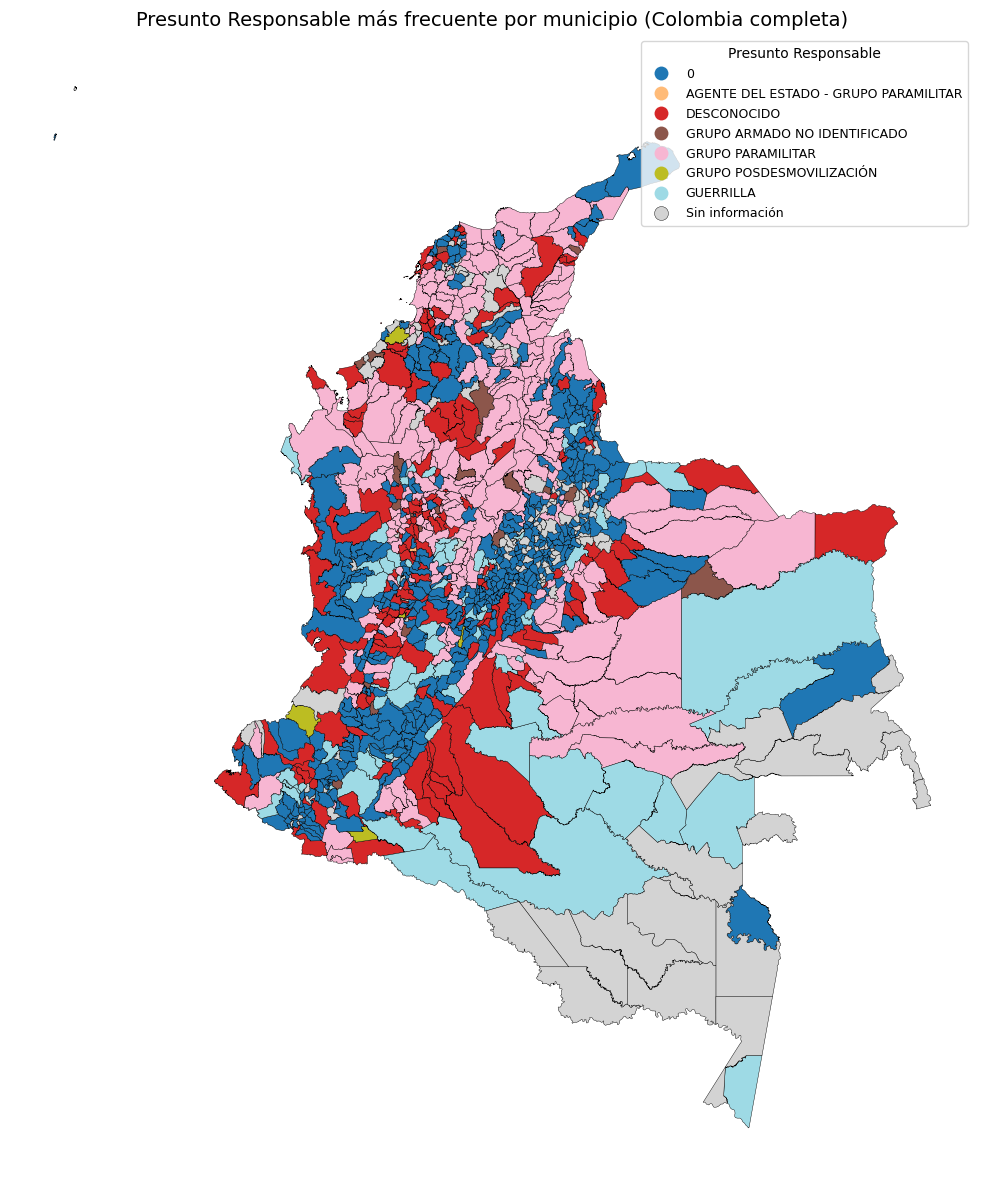

In [121]:
import matplotlib.pyplot as plt

# Eliminar valores numéricos tipo 0 si no corresponden a responsables válidos
gdf_mapa['RESPONSABLE_DOMINANTE'] = gdf_mapa['RESPONSABLE_DOMINANTE'].replace('0', None)

# Creamos la figura
fig, ax = plt.subplots(figsize=(14, 12))

# Mapa completo
gdf_mapa.plot(
    column='RESPONSABLE_DOMINANTE',
    categorical=True,
    legend=True,
    cmap='tab20',
    linewidth=0.3,
    edgecolor='black',
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "label": "Sin información"
    }
)

# Título
plt.title('Presunto Responsable más frecuente por municipio (Colombia completa)', fontsize=14)

# Ocultar ejes
plt.axis('off')

# Ajustar leyenda para que se vea mejor
leg = ax.get_legend()
leg.set_title("Presunto Responsable")
for text in leg.get_texts():
    text.set_fontsize(9)

plt.tight_layout()
plt.show()


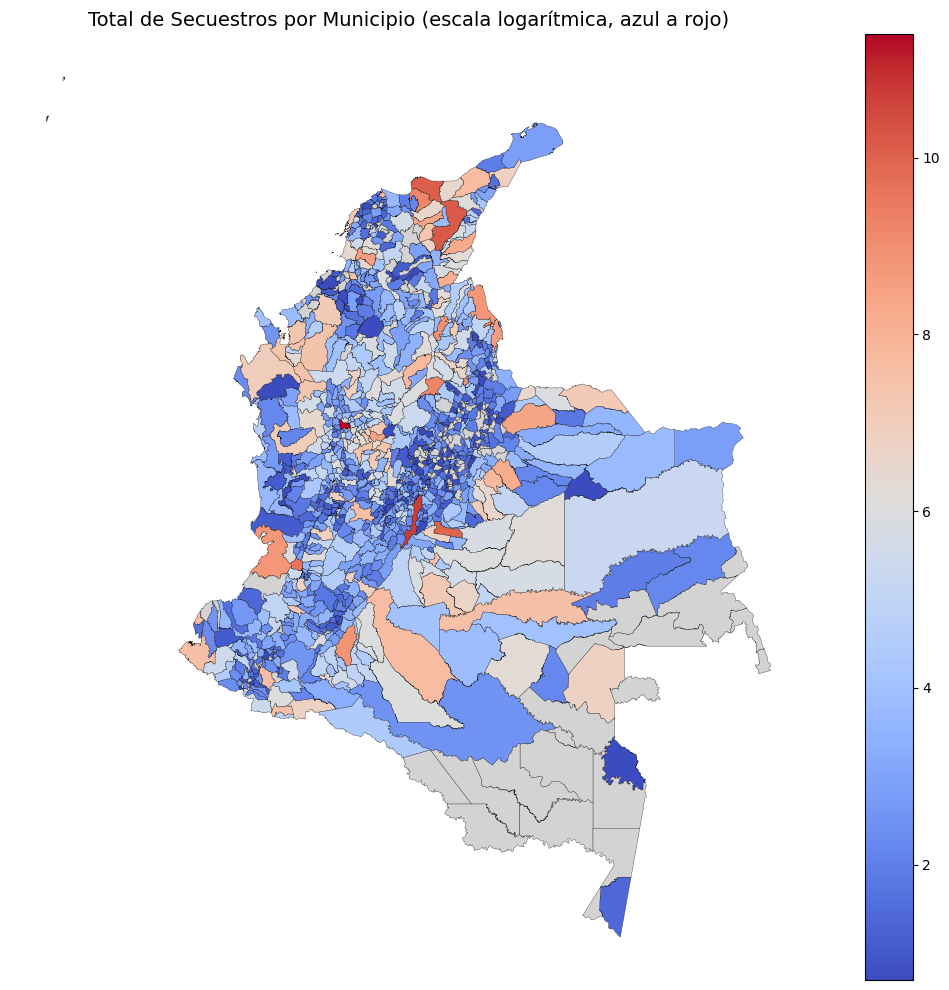

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Crear nueva columna logarítmica para TOTAL SECUESTROS
gdf_mapa['LOG_SECUESTROS'] = np.log1p(gdf_mapa['TOTAL SECUESTROS'])

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Graficar mapa con escala de color de azul a rojo
gdf_mapa.plot(
    column='LOG_SECUESTROS',
    cmap='coolwarm',  # También puedes probar 'RdBu_r' si prefieres más contraste
    legend=True,
    linewidth=0.2,
    edgecolor='black',
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "label": "Sin información"
    }
)

# Ajustes del mapa
plt.title('Total de Secuestros por Municipio (escala logarítmica, azul a rojo)', fontsize=14)
plt.axis('off')

# Mostrar
plt.tight_layout()
plt.show()


Acciones bélicas

In [130]:
DF_ACCIONESBELICAS = pd.read_csv("/Users/mac/Library/CloudStorage/OneDrive-UniversidadExternadodeColombia/MINE/segundo semestre/Seminario/Mi_primer_proyecto/Datos/datos_1995-2024/Eventos_de_Violencia_del_Conflicto_Armado_Acciones Bélicas.csv", delimiter=";")

# Asegurar que el código DANE sea string y tenga siempre 5 dígitos
DF_ACCIONESBELICAS['Código DANE de Municipio'] = DF_ACCIONESBELICAS['Código DANE de Municipio'].astype(str).str.zfill(5)

# Crear la columna 'key' uniendo código DANE y año
DF_ACCIONESBELICAS['key'] = DF_ACCIONESBELICAS['Código DANE de Municipio'] + '-' + DF_ACCIONESBELICAS['Año'].astype(str)





In [133]:
# Renombrar temporalmente las columnas para usar to_datetime
DF_ACCIONESBELICAS = DF_ACCIONESBELICAS.rename(columns={
    'Año': 'year',
    'Mes': 'month',
    'Día': 'day'
})

# Crear la columna FECHA_AB
DF_ACCIONESBELICAS['FECHA_AB'] = pd.to_datetime(
    DF_ACCIONESBELICAS[['year', 'month', 'day']],
    errors='coerce'
)

# Volver a nombres originales si quieres
DF_ACCIONESBELICAS = DF_ACCIONESBELICAS.rename(columns={
    'year': 'Año',
    'month': 'Mes',
    'day': 'Día'
})



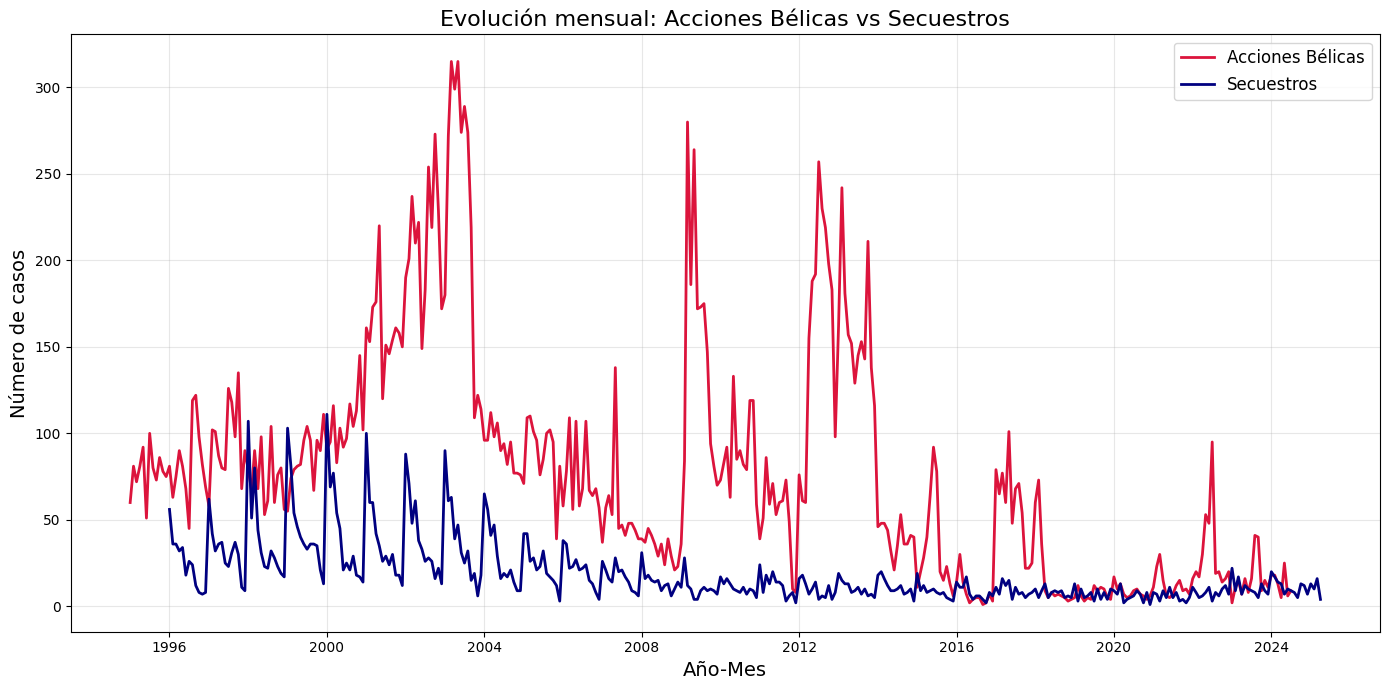

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear columna año-mes
DF_ACCIONESBELICAS['AÑO_MES_AB'] = DF_ACCIONESBELICAS['FECHA_AB'].dt.to_period('M').astype(str)
MERGE1['AÑO_MES_SEC'] = MERGE1['fecha_hecho'].dt.to_period('M').astype(str)

# Agrupar cantidad de casos por año-mes
acciones_tiempo = DF_ACCIONESBELICAS.groupby('AÑO_MES_AB').size().reset_index(name='ACCIONES_BELICAS')
secuestros_tiempo = MERGE1.groupby('AÑO_MES_SEC').size().reset_index(name='SECUUESTROS')

# Convertir a datetime para graficar correctamente
acciones_tiempo['AÑO_MES_AB'] = pd.to_datetime(acciones_tiempo['AÑO_MES_AB'])
secuestros_tiempo['AÑO_MES_SEC'] = pd.to_datetime(secuestros_tiempo['AÑO_MES_SEC'])

# Gráfica
plt.figure(figsize=(14, 7))

plt.plot(acciones_tiempo['AÑO_MES_AB'], acciones_tiempo['ACCIONES_BELICAS'], 
         label='Acciones Bélicas', color='crimson', linewidth=2)

plt.plot(secuestros_tiempo['AÑO_MES_SEC'], secuestros_tiempo['SECUUESTROS'], 
         label='Secuestros', color='navy', linewidth=2)

plt.title('Evolución mensual: Acciones Bélicas vs Secuestros', fontsize=16)
plt.xlabel('Año-Mes', fontsize=14)
plt.ylabel('Número de casos', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


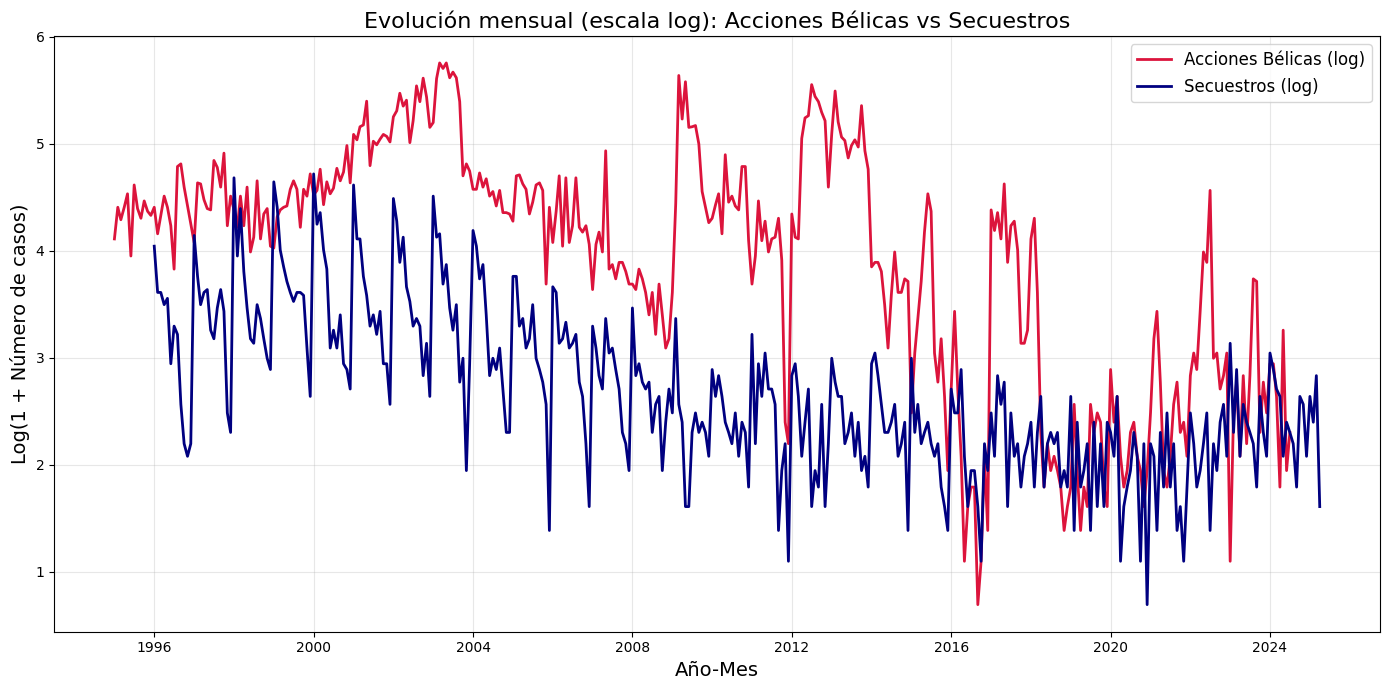

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear columna año-mes
DF_ACCIONESBELICAS['AÑO_MES_AB'] = DF_ACCIONESBELICAS['FECHA_AB'].dt.to_period('M').astype(str)
MERGE1['AÑO_MES_SEC'] = MERGE1['fecha_hecho'].dt.to_period('M').astype(str)

# Agrupar por año-mes
acciones_tiempo = DF_ACCIONESBELICAS.groupby('AÑO_MES_AB').size().reset_index(name='ACCIONES_BELICAS')
secuestros_tiempo = MERGE1.groupby('AÑO_MES_SEC').size().reset_index(name='SECUUESTROS')

# Convertir año-mes a datetime
acciones_tiempo['AÑO_MES_AB'] = pd.to_datetime(acciones_tiempo['AÑO_MES_AB'])
secuestros_tiempo['AÑO_MES_SEC'] = pd.to_datetime(secuestros_tiempo['AÑO_MES_SEC'])

# Aplicar logaritmo seguro (log1p para evitar log(0))
acciones_tiempo['ACCIONES_BELICAS_LOG'] = np.log1p(acciones_tiempo['ACCIONES_BELICAS'])
secuestros_tiempo['SECUUESTROS_LOG'] = np.log1p(secuestros_tiempo['SECUUESTROS'])

# Gráfica
plt.figure(figsize=(14, 7))

plt.plot(acciones_tiempo['AÑO_MES_AB'], acciones_tiempo['ACCIONES_BELICAS_LOG'],
         label='Acciones Bélicas (log)', color='crimson', linewidth=2)

plt.plot(secuestros_tiempo['AÑO_MES_SEC'], secuestros_tiempo['SECUUESTROS_LOG'],
         label='Secuestros (log)', color='navy', linewidth=2)

plt.title('Evolución mensual (escala log): Acciones Bélicas vs Secuestros', fontsize=16)
plt.xlabel('Año-Mes', fontsize=14)
plt.ylabel('Log(1 + Número de casos)', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [144]:
# Agrupar y sumar por key
df_acciones_suma = DF_ACCIONESBELICAS.groupby('key').size().reset_index(name='ACCIONES_BELICAS')

In [158]:
# Agrupar por las variables indicadas y sumar el total de víctimas
df_acciones_suma = DF_ACCIONESBELICAS.groupby(['key'])[['Total de Víctimas del Caso']].sum().reset_index()

# Cambiar nombre de columna
df_acciones_suma.rename(columns={'Total de Víctimas del Caso': 'TOTAL_ACCIONES'}, inplace=True)



In [205]:
MERGE5.columns

Index(['key', 'municipio', 'departamento', 'ano', 'mes', 'fecha_hecho',
       'cod_muni', 'SECUESTRO EXTORSIVO', 'SECUESTRO SIMPLE',
       'TOTAL SECUESTROS', 'POB_CABECERA', 'POB_RURAL', 'POB_TOTAL',
       'Tasa_100_habitantes', 'periodo', 'AñoMes', 'ASESINATOS',
       'Coeficiente de Gini', 'Incidencia de la pobreza monetaria',
       'Incidencia de la pobreza monetaria extrema',
       'Población en condición de miseria',
       'Índice de pobreza multidimensional - IPM', 'CULTIVOS_COCA',
       'TOTAL_DESAPARICION'],
      dtype='object')

In [206]:
# Unir MERGE5 con df_acciones_suma usando 'key'
MERGE6 = MERGE5.merge(df_acciones_suma, on='key', how='left')

MERGE6.columns

Index(['key', 'municipio', 'departamento', 'ano', 'mes', 'fecha_hecho',
       'cod_muni', 'SECUESTRO EXTORSIVO', 'SECUESTRO SIMPLE',
       'TOTAL SECUESTROS', 'POB_CABECERA', 'POB_RURAL', 'POB_TOTAL',
       'Tasa_100_habitantes', 'periodo', 'AñoMes', 'ASESINATOS',
       'Coeficiente de Gini', 'Incidencia de la pobreza monetaria',
       'Incidencia de la pobreza monetaria extrema',
       'Población en condición de miseria',
       'Índice de pobreza multidimensional - IPM', 'CULTIVOS_COCA',
       'TOTAL_DESAPARICION', 'TOTAL_ACCIONES'],
      dtype='object')

GRAFICA

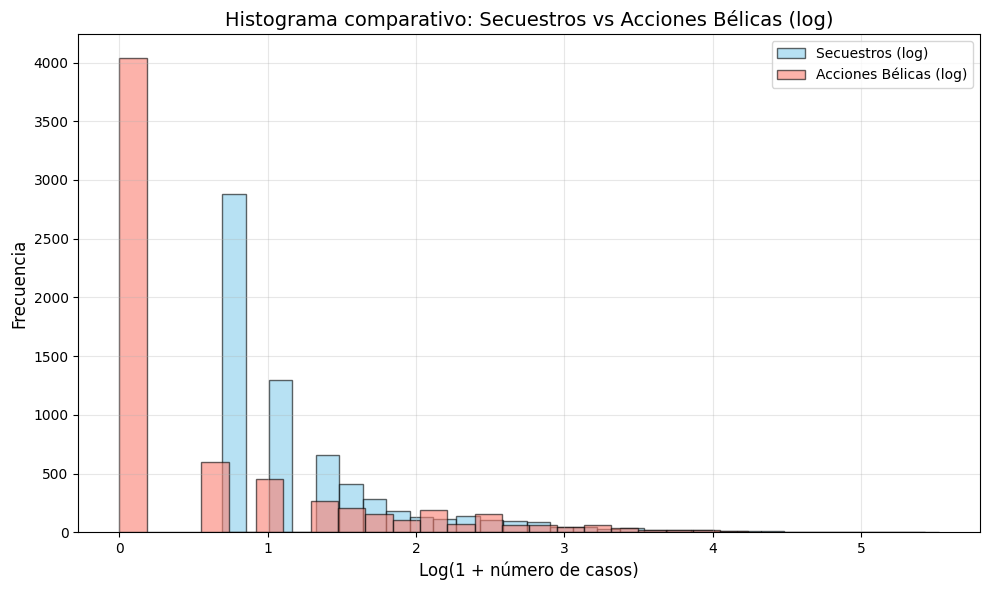

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Reemplazar posibles NaN con 0 antes de aplicar log
MERGE6['TOTAL SECUESTROS'] = MERGE6['TOTAL SECUESTROS'].fillna(0)
MERGE6['TOTAL_ACCIONES'] = MERGE6['TOTAL_ACCIONES'].fillna(0)

# Aplicar log seguro (log1p para evitar problemas con ceros)
log_secuestros = np.log1p(MERGE6['TOTAL SECUESTROS'])
log_acciones = np.log1p(MERGE6['TOTAL_ACCIONES'])

# Crear histograma comparativo
plt.figure(figsize=(10, 6))

plt.hist(log_secuestros, bins=30, alpha=0.6, label='Secuestros (log)', color='skyblue', edgecolor='black')
plt.hist(log_acciones, bins=30, alpha=0.6, label='Acciones Bélicas (log)', color='salmon', edgecolor='black')

plt.title('Histograma comparativo: Secuestros vs Acciones Bélicas (log)', fontsize=14)
plt.xlabel('Log(1 + número de casos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [208]:
import plotly.express as px

# Agrupar datos por departamento
treemap_df = MERGE6.groupby('departamento', as_index=False)['TOTAL_ACCIONES'].sum()

# Crear treemap con Plotly
fig = px.treemap(
    treemap_df,
    path=['departamento'],
    values='TOTAL_ACCIONES',
    color='TOTAL_ACCIONES',
    color_continuous_scale='Blues',
    title='Distribución de TOTAL_ACCIONES por Departamento'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [ ]:
import plotly.express as px

# Agrupar datos por departamento
treemap_df = MERGE6.groupby('departamento', as_index=False)['TOTAL SECUESTROS'].sum()

# Crear treemap con Plotly
fig = px.treemap(
    treemap_df,
    path=['departamento'],
    values='TOTAL SECUESTROS',
    color='TOTAL SECUESTROS',
    color_continuous_scale='Blues',
    title='Distribución de TOTAL SECUESTROS por Departamento'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


: 

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Asegurar reemplazo de NaN con 0
MERGE2_gdf['TOTAL SECUESTROS'] = MERGE2_gdf['TOTAL SECUESTROS'].fillna(0)
MERGE2_gdf['TOTAL_ACCIONES'] = MERGE2_gdf['TOTAL_ACCIONES'].fillna(0)

# Centroides
MERGE2_gdf['lon'] = MERGE2_gdf.geometry.centroid.x
MERGE2_gdf['lat'] = MERGE2_gdf.geometry.centroid.y

# Crear figura combinada
fig = go.Figure()

# Capa Secuestros
fig.add_trace(go.Scattermapbox(
    lat=MERGE2_gdf['lat'],
    lon=MERGE2_gdf['lon'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=MERGE2_gdf['TOTAL SECUESTROS'],
        color='orange',
        sizemode='area',
        sizemin=2,
        sizeref=2.*MERGE2_gdf['TOTAL SECUESTROS'].max()/(40.**2), # Ajusta tamaño
        opacity=0.5
    ),
    name='TOTAL SECUESTROS',
    hovertext=MERGE2_gdf['municipio'] + "<br>Secuestros: " + MERGE2_gdf['TOTAL SECUESTROS'].astype(int).astype(str)
))

# Capa Acciones Bélicas
fig.add_trace(go.Scattermapbox(
    lat=MERGE2_gdf['lat'],
    lon=MERGE2_gdf['lon'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=MERGE2_gdf['TOTAL_ACCIONES'],
        color='blue',
        sizemode='area',
        sizemin=2,
        sizeref=2.*MERGE2_gdf['TOTAL_ACCIONES'].max()/(40.**2),
        opacity=0.5
    ),
    name='TOTAL ACCIONES',
    hovertext=MERGE2_gdf['municipio'] + "<br>Acciones: " + MERGE2_gdf['TOTAL_ACCIONES'].astype(int).astype(str)
))

# Configurar mapa base
fig.update_layout(
    mapbox_style='carto-positron',
    mapbox_zoom=4.5,
    mapbox_center={"lat": MERGE2_gdf['lat'].mean(), "lon": MERGE2_gdf['lon'].mean()},
    title='Comparativo: TOTAL SECUESTROS vs TOTAL ACCIONES',
    legend=dict(x=0.01, y=0.99)
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


/var/folders/qz/g5m1ndq17q7_y3lpcdy5s2nh0000gn/T/ipykernel_1724/1705137315.py:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/qz/g5m1ndq17q7_y3lpcdy5s2nh0000gn/T/ipykernel_1724/1705137315.py:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/qz/g5m1ndq17q7_y3lpcdy5s2nh0000gn/T/ipykernel_1724/1705137315.py:16: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/qz/g5m1ndq17q7_y3lpcdy5s2nh0000gn/T/ipykernel_1724/1705137315.py:33: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



: 

MASACRES

In [212]:
DF_MASACRES = pd.read_excel("/Users/mac/Library/CloudStorage/OneDrive-UniversidadExternadodeColombia/MINE/segundo semestre/Seminario/Mi_primer_proyecto/Datos/Eventos_de_Violencia_del_Conflicto_Armado_Masacres.xlsx")


In [224]:
# Asegurar tipo string y completar con ceros a la izquierda hasta 5 dígitos
DF_MASACRES['codigo_municipio'] = DF_MASACRES['codigo_municipio'].astype(str).str.zfill(5)

# Eliminar la columna 'key'
DF_MASACRES = DF_MASACRES.drop(columns=['key'])





In [225]:
# Asegurar que ambas columnas estén en string
DF_MASACRES['codigo_municipio'] = DF_MASACRES['codigo_municipio'].astype(str).str.zfill(5)
DF_MASACRES['año'] = DF_MASACRES['año'].astype(str)

# Crear la nueva columna key
DF_MASACRES['key'] = DF_MASACRES['codigo_municipio'] + '-' + DF_MASACRES['año']

DF_MASACRES

año codigo_municipio               Municipio     Departamento  \
0     1995            47268                EL RETEN        MAGDALENA   
1     1995            73870            VILLAHERMOSA           TOLIMA   
2     1995            76001        SANTIAGO DE CALI  VALLE DEL CAUCA   
3     1995            13001     CARTAGENA DE INDIAS          BOLIVAR   
4     1995            70708              SAN MARCOS            SUCRE   
...    ...              ...                     ...              ...   
2906  2023            19698  SANTANDER DE QUILICHAO            CAUCA   
2907  2024            05197                 COCORNA        ANTIOQUIA   
2908  2024            41349                    HOBO            HUILA   
2909  2024            19533                PIAMONTE            CAUCA   
2910  2024            47288               FUNDACION        MAGDALENA   

                  Modalidad                    Iniciativa  Guerrilleros  \
0                    ASALTO             GRUPO PARAMILITAR             0   
1     ATAQUE INDISCRIMINADO             GRUPO PARAMILITAR             0   
2                    ASALTO  GRUPO ARMADO NO IDENTIFICADO             0   
3                      RUTA  GRUPO ARMADO NO IDENTIFICADO             0   
4           INTERCEPTACIÃ“N             GRUPO PARAMILITAR             0   
...                     ...                           ...           ...   
2906                 ASALTO  GRUPO ARMADO NO IDENTIFICADO             0   
2907            DESCONOCIDA  GRUPO ARMADO NO IDENTIFICADO             0   
2908            DESCONOCIDA                     GUERRILLA             0   
2909                   RUTA  GRUPO ARMADO NO IDENTIFICADO             0   
2910              SICARIATO  GRUPO ARMADO NO IDENTIFICADO             0   

      Paramilitares  Grupos PosdesmovilizaciÃ³n  \
0                 0                           0   
1                 0                           0   
2                 1                           0   
3                 1                           0   
4                 1                           0   
...             ...                         ...   
2906              0                           0   
2907              0                           0   
2908              0                           0   
2909              0                           0   
2910              0                           0   

      Combatientes Sin InformaciÃ³n  Otros Grupos Armados Organizados  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   
...                             ...                               ...   
2906                              0                                 0   
2907                              0                                 0   
2908                              0                                 0   
2909                              0                                 0   
2910                              0                                 0   

      Total Combatientes de Grupos Armados Organizados  Total Combatientes  \
0                                                    0                   0   
1                                                    0                   0   
2                                                    0                   9   
3                                                    0                   1   
4                                                    1                   0   
...                                                ...                 ...   
2906                                                 0                   0   
2907                                                 0                   0   
2908                                             

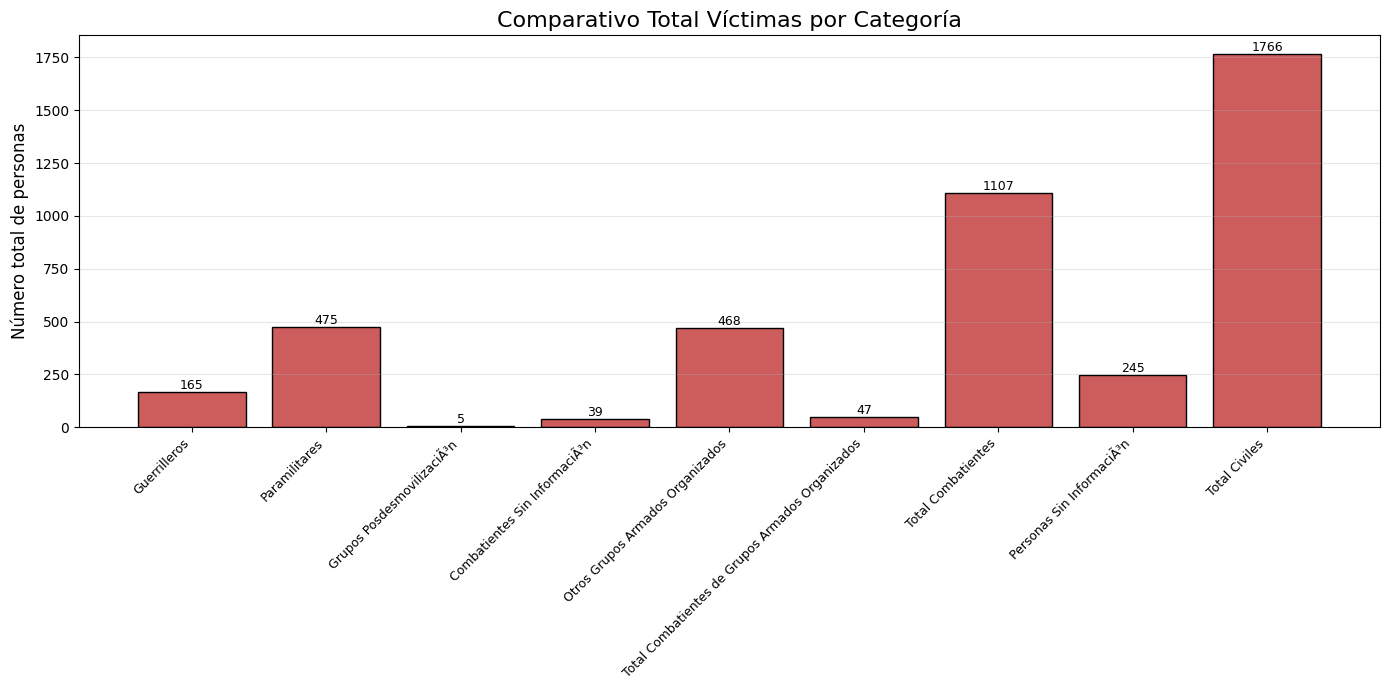

In [213]:
import matplotlib.pyplot as plt

# Lista exacta de variables según tu base de datos
variables = [
    'Guerrilleros',
    'Paramilitares',
    'Grupos PosdesmovilizaciÃ³n',
    'Combatientes Sin InformaciÃ³n',
    'Otros Grupos Armados Organizados',
    'Total Combatientes de Grupos Armados Organizados',
    'Total Combatientes',
    'Personas Sin InformaciÃ³n',
    'Total Civiles'
]

# Sumar los totales para cada variable
suma_variables = DF_MASACRES[variables].sum()

# Gráfico de barras
plt.figure(figsize=(14, 7))
bars = plt.bar(suma_variables.index, suma_variables.values, color='indianred', edgecolor='black')

# Títulos y etiquetas
plt.title('Comparativo Total Víctimas por Categoría', fontsize=16)
plt.ylabel('Número total de personas', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.grid(axis='y', alpha=0.3)

# Mostrar valores encima de las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


/opt/miniconda3/envs/secuestro/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 129 (\x81) missing from font(s) DejaVu Sans.

/opt/miniconda3/envs/secuestro/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 129 (\x81) missing from font(s) DejaVu Sans.



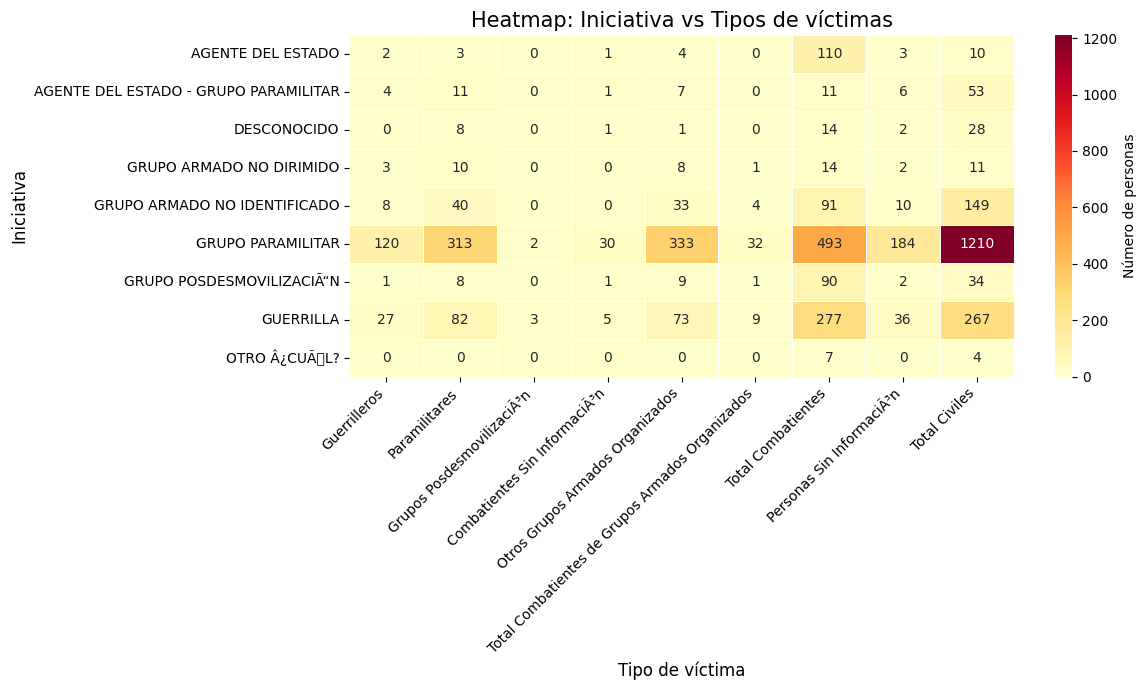

In [215]:


# Variables a usar
variables = [
    'Guerrilleros',
    'Paramilitares',
    'Grupos PosdesmovilizaciÃ³n',
    'Combatientes Sin InformaciÃ³n',
    'Otros Grupos Armados Organizados',
    'Total Combatientes de Grupos Armados Organizados',
    'Total Combatientes',
    'Personas Sin InformaciÃ³n',
    'Total Civiles'
]

# Agrupar por 'Iniciativa' y sumar
df_heatmap = DF_MASACRES.groupby('Iniciativa')[variables].sum()

# Ordenar Iniciativas alfabéticamente (opcional)
df_heatmap = df_heatmap.sort_index()

# Crear Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df_heatmap, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.5, cbar_kws={"label": "Número de personas"})

plt.title('Heatmap: Iniciativa vs Tipos de víctimas', fontsize=15)
plt.xlabel('Tipo de víctima', fontsize=12)
plt.ylabel('Iniciativa', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<p style="text-align: justify;">
La gráfica anterior presenta un análisis comparativo del número total de víctimas clasificadas por tipo, según la iniciativa responsable en los casos registrados. Se observa claramente que la mayor concentración de víctimas corresponde a los casos atribuidos a los grupos paramilitares, destacándose especialmente el número de víctimas civiles, con un total de 1.210 personas, seguido por los combatientes con 493 víctimas. Esta tendencia evidencia un patrón de afectación particularmente grave hacia la población civil por parte de estos actores armados.
</p>
<p style="text-align: justify;">
Asimismo, se identifican cifras significativas asociadas a las acciones de la guerrilla, que reporta 267 víctimas civiles y 277 combatientes, reflejando un impacto importante tanto sobre población no combatiente como sobre actores armados.
</p>
<p style="text-align: justify;">
En contraste, otras categorías como grupo armado no identificado, grupo armado no dirimido, o desconocido, presentan cifras totales considerablemente más bajas, concentradas en segmentos muy específicos de víctimas o en números marginales.
</p>
<p style="text-align: justify;">
Este análisis permite evidenciar cómo determinados actores armados concentran su accionar violento sobre ciertas poblaciones, siendo particularmente alarmante la carga de victimización sobre la población civil atribuida a los grupos paramilitares, lo que resalta la necesidad de políticas diferenciadas de protección y reparación integral para las víctimas de estos grupos.
</p>


In [226]:
# Agrupar por key y sumar las víctimas
df_masacres_suma = DF_MASACRES.groupby('key', as_index=False)[['Total de VÃ­ctimas del Caso']].sum()

# Cambiar nombre de la columna
df_masacres_suma = df_masacres_suma.rename(columns={'Total de VÃ­ctimas del Caso': 'TOTAL MASACRE'})

df_masacres_suma


key  TOTAL MASACRE
0     00000-2002              5
1     05000-1996              5
2     05001-1995             30
3     05001-1996             51
4     05001-1997             76
...          ...            ...
1744  EXPAN-2003              4
1745  EXVEN-2000              4
1746  EXVEN-2003              5
1747  EXVEN-2006              7
1748  EXVEN-2009             11

[1749 rows x 2 columns]

In [227]:
# Unir MERGE6 con df_masacres_suma usando la columna 'key'
MERGE7 = MERGE6.merge(df_masacres_suma, on='key', how='left')

# Reemplazar NaN en TOTAL MASACRE con 0 (donde no hubo masacres)
MERGE7['TOTAL MASACRE'] = MERGE7['TOTAL MASACRE'].fillna(0)

MERGE7


key municipio departamento   ano  mes fecha_hecho cod_muni  \
0     05001-1996  MEDELLIN    ANTIOQUIA  1996    1  1996-01-06    05001   
1     05001-1997  MEDELLIN    ANTIOQUIA  1997    1  1997-01-22    05001   
2     05001-1998  MEDELLIN    ANTIOQUIA  1998    1  1998-01-05    05001   
3     05001-1999  MEDELLIN    ANTIOQUIA  1999    1  1999-01-10    05001   
4     05001-2000  MEDELLIN    ANTIOQUIA  2000    1  2000-01-03    05001   
...          ...       ...          ...   ...  ...         ...      ...   
6595  99773-2003  CUMARIBO      VICHADA  2003    2  2003-02-19    99773   
6596  99773-2005  CUMARIBO      VICHADA  2005    6  2005-06-25    99773   
6597  99773-2006  CUMARIBO      VICHADA  2006    9  2006-09-11    99773   
6598  99773-2011  CUMARIBO      VICHADA  2011    3  2011-03-08    99773   
6599  99773-2013  CUMARIBO      VICHADA  2013    9  2013-09-18    99773   

      SECUESTRO EXTORSIVO  SECUESTRO SIMPLE  TOTAL SECUESTROS  ...  \
0                    73.0               8.0              81.0  ...   
1                    55.0              19.0              74.0  ...   
2                    60.0              21.0              81.0  ...   
3                    78.0              26.0             104.0  ...   
4                    66.0              53.0             119.0  ...   
...                   ...               ...               ...  ...   
6595                  3.0               0.0               3.0  ...   
6596                  0.0               1.0               1.0  ...   
6597                  0.0               1.0               1.0  ...   
6598                  1.0               0.0               1.0  ...   
6599                  0.0               1.0               1.0  ...   

      ASESINATOS  Coeficiente de Gini  Incidencia de la pobreza monetaria  \
0         1036.0                  0.0                                 0.0   
1         1270.0                  0.0                                 0.0   
2         1308.0                  0.0                                 0.0   
3         1528.0                  0.0                                 0.0   
4         1662.0                  0.0                                 0.0   
...          ...                  ...                                 ...   
6595         4.0                  0.0                                 0.0   
6596        10.0                  0.0                                 0.0   
6597         8.0                  0.0                                 0.0   
6598         0.0                  0.0                                 0.0   
6599         0.0                  0.0                                 0.0   

      Incidencia de la pobreza monetaria extrema  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
6595                                         0.0   
6596                                         0.0   
6597                                         0.0   
6598                                         0.0   
6599                                         0.0   

      Población en condición de miseria  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
...                                 ...   
6595                                0.0   
6596                                0.0   
6597                                0.0   
6598                                0.0   
6599                                0.0   

     Índice de pobreza multidimensional - IPM  CULTIVOS_COCA  \
0                                        0.00            0.0   
1                                        0.00            0.0   
2           

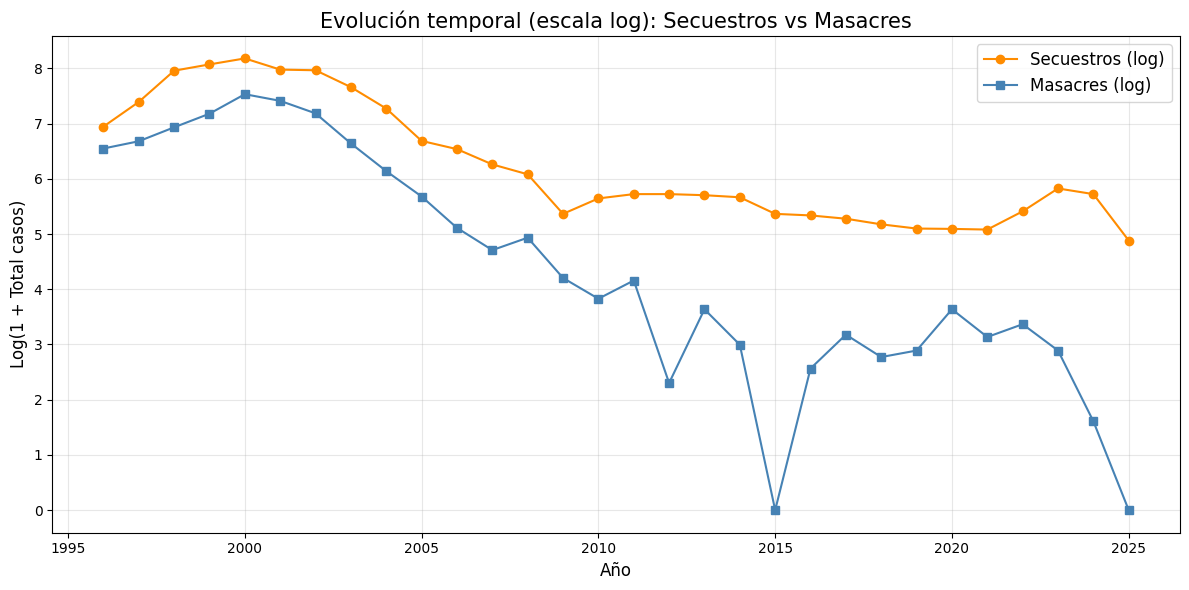

In [229]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar TOTAL SECUESTROS y TOTAL MASACRE por año
evolucion = MERGE7.groupby('ano')[['TOTAL SECUESTROS', 'TOTAL MASACRE']].sum().reset_index()

# Aplicar log1p para manejar ceros (log(1 + x))
evolucion['LOG_SECUESTROS'] = np.log1p(evolucion['TOTAL SECUESTROS'])
evolucion['LOG_MASACRE'] = np.log1p(evolucion['TOTAL MASACRE'])

# Gráfico de líneas con log
plt.figure(figsize=(12,6))

plt.plot(evolucion['ano'], evolucion['LOG_SECUESTROS'], label='Secuestros (log)', color='darkorange', marker='o')
plt.plot(evolucion['ano'], evolucion['LOG_MASACRE'], label='Masacres (log)', color='steelblue', marker='s')

plt.title('Evolución temporal (escala log): Secuestros vs Masacres', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Log(1 + Total casos)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


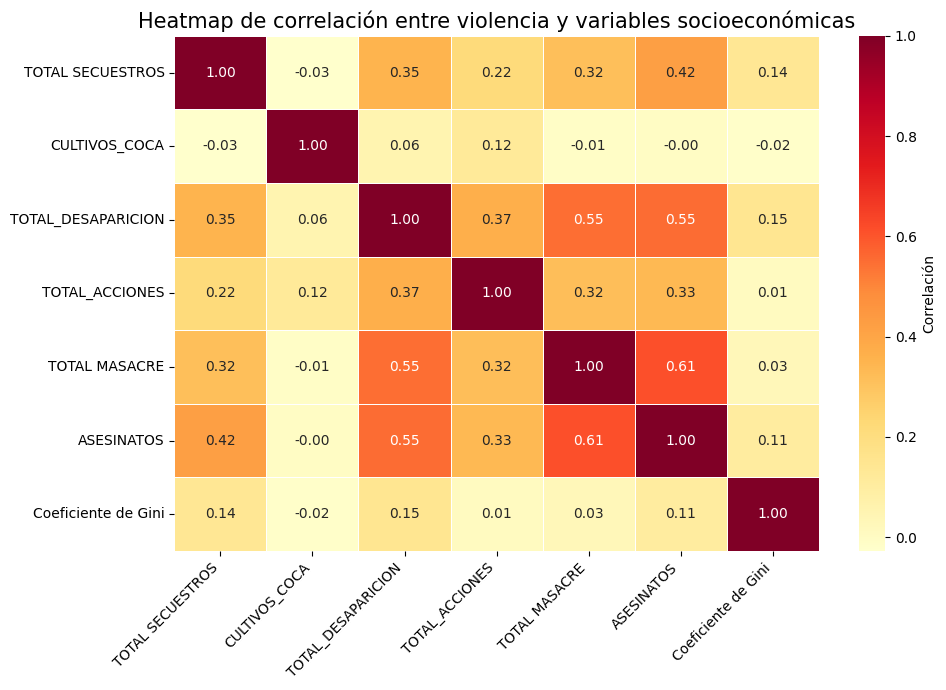

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables
variables = [
    'TOTAL SECUESTROS',
    'CULTIVOS_COCA',
    'TOTAL_DESAPARICION',
    'TOTAL_ACCIONES',
    'TOTAL MASACRE',
    'ASESINATOS',
    'Coeficiente de Gini'
]

# Filtrar el DataFrame
df_corr = MERGE7[variables].copy()

# Calcular la matriz de correlación
corr_matrix = df_corr.corr()

# Graficar heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', linewidths=0.5, fmt=".2f", cbar_kws={"label": "Correlación"})

plt.title('Heatmap de correlación entre violencia y variables socioeconómicas', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

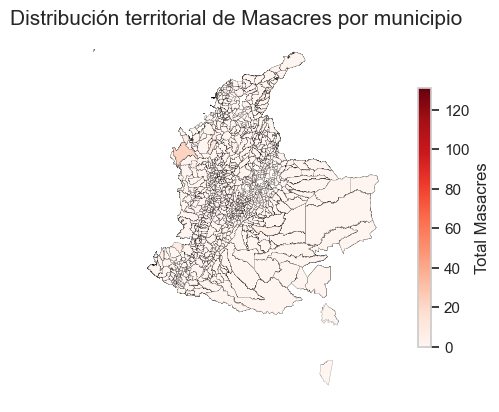

In [234]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Hacemos el merge por 'key'
mapa_masacres = MERGE2_gdf.merge(df_masacres_suma[['key', 'TOTAL MASACRE']], on='key', how='left')

# 2. Rellenar NaN con 0 en TOTAL MASACRE
mapa_masacres['TOTAL MASACRE'] = mapa_masacres['TOTAL MASACRE'].fillna(0)

# 3. Crear mapa coroplético
plt.figure(figsize=(12, 8))
ax = mapa_masacres.plot(column='TOTAL MASACRE',
                        cmap='Reds',
                        linewidth=0.1,
                        edgecolor='black',
                        legend=True,
                        legend_kwds={'label': "Total Masacres", 'shrink': 0.7})

ax.set_title('Distribución territorial de Masacres por municipio', fontsize=15)
ax.axis('off')
plt.show()


In [ ]:
MERGE